1. [**Исследование данных**](#preprocessing)
    * [Пропуски](#omission)
    * [Типы данных](#type_data)
    * [Названия населённых пунктов](#names)
    * [Дубликаты](#duplicates)
    * [Добавление необходимых столбцов](#add_columns)
    * [Заключение по предобработке](#summary_preprocessing)
1. [**Анализ**](#analysis)
    * [Типичные параметры продаваемых квартир](#tipical)
        * [Промежуточные выводы](#conclusion)
    * [Время, которое объявление остаётся активным](#timing)
    * [Исключение необычных параметров](#anomalies)
    * [Факторы, влияющие на стоимость](#factors)
    * [Цена квадратного метра](#price)
    * [Квартиры в центре](#center)
    * [Отличительные особенности апартаментов, студий и квартир свободной планировки](#apart)
1. [**Выводы**](#summary)

<a id="preprocessing"></a>
# **Исследование данных**

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
from pymystem3 import Mystem
m = Mystem()
from collections import Counter

In [3]:
real_estate = pd.read_csv('../datasets/real_estate_data.csv')
pd.set_option('display.max_columns', None)

Посмотрим как выглядит таблица.

In [4]:
real_estate.head(5)

Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

  building_series_id\ttotal_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\tarea\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition  
0  1564812\t20\t13000000.0\t108.0\t2019-03-07T00:...                                                                                                                                                                                                                                                                                              
1  \t7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t...                                                                                                                                                                                                                                                                                              
2  Сталинский\t10\t5196000.0\t56.0\t2015-08-20T00...                                                                                                                                                                                                                                                                                              
3  \t0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3...                                                                                                                                                                                                                                                                                              
4  \t2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2...

Данные склеились. Нужно прочитать по-другому

In [5]:
real_estate = pd.read_csv('../datasets/real_estate_data.csv', sep = '[,\t]', engine='python', encoding='utf8')
del real_estate['Unnamed: 0'] #из-за выгрузки датасета на локальный комп
del real_estate['building_series_id']
del real_estate['area']

In [6]:
real_estate.sample(5)

total_images  last_price  total_area first_day_exposition  rooms  \
7702             10   1090000.0        40.8  2018-06-01T00:00:00      1   
18585            10  16500000.0       108.0  2018-01-01T00:00:00      3   
1095              9   6000000.0        30.3  2018-09-18T00:00:00      1   
5351              7   7300000.0        51.4  2018-11-23T00:00:00      3   
11082             1   2650000.0        54.7  2016-02-01T00:00:00      3   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
7702              NaN           2.0         20.0      2          NaN   False   
18585             NaN           7.0         63.0      3          NaN   False   
1095             3.15          19.0         14.2      5          NaN   False   
5351             3.10           7.0         34.2      3          NaN   False   
11082            2.58           4.0         40.5      1          NaN   False   

       open_plan  kitchen_area  balcony                     locality_name  \
7702       False          10.0      NaN                  поселок Каложицы   
18585      False          20.0      NaN                   Санкт-Петербург   
1095       False           8.5      1.0                   Санкт-Петербург   
5351       False           8.6      NaN                   Санкт-Петербург   
11082      False           4.9      0.0  поселок городского типа Дубровка   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
7702                NaN                  NaN               NaN            NaN   
18585           25988.0               6556.0               2.0          496.0   
1095            18748.0               4341.0               0.0            NaN   
5351            25221.0               4069.0               0.0            NaN   
11082               NaN                  NaN               NaN            NaN   

       ponds_around3000  ponds_nearest  days_exposition  
7702                NaN            NaN            101.0  
18585               1.0          334.0            232.0  
1095                0.0            NaN             77.0  
5351                2.0          653.0              NaN  
11082               NaN            NaN            485.0

In [7]:
real_estate.head(5)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0      NaN  Санкт-Петербург           18863.0   
1      False          11.0      2.0   посёлок Шушары           12817.0   
2      False           8.3      0.0  Санкт-Петербург           21741.0   
3      False           NaN      0.0  Санкт-Петербург           28098.0   
4      False          41.0      NaN  Санкт-Петербург           31856.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0               2.0   
3               6800.0               2.0           84.0               3.0   
4               8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0

In [8]:
real_estate.tail(5)

total_images  last_price  total_area first_day_exposition  rooms  \
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
23694             3.7           5.0         73.3      3          NaN   False   
23695             NaN           5.0         38.0      4          NaN   False   
23696             NaN           3.0         29.7      1          NaN   False   
23697             3.0          17.0          NaN     12          NaN   False   
23698             2.5           5.0         12.3      1          NaN   False   

       open_plan  kitchen_area  balcony        locality_name  \
23694      False         13.83      NaN      Санкт-Петербург   
23695      False          8.50      NaN                Тосно   
23696      False           NaN      NaN     село Рождествено   
23697      False         23.30      2.0      Санкт-Петербург   
23698      False          9.00      NaN  поселок Новый Учхоз   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
23694           24665.0               4232.0               1.0          796.0   
23695               NaN                  NaN               NaN            NaN   
23696               NaN                  NaN               NaN            NaN   
23697           39140.0              10364.0               2.0          173.0   
23698               NaN                  NaN               NaN            NaN   

       ponds_around3000  ponds_nearest  days_exposition  
23694               3.0          381.0              NaN  
23695               NaN            NaN             45.0  
23696               NaN            NaN              NaN  
23697               3.0          196.0            602.0  
23698               NaN            NaN              NaN

In [9]:
print (real_estate.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


Названия столбцов в порядке.

In [10]:
print (real_estate.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Количество строк по столбцам не совпадает.

In [11]:
real_estate.describe()

total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445      4.885249      5.905438      1.071300   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     18.600000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.100000      1.000000   
75%       16.000000     42.300000      8.000000     12.000000      2.000000   
max       60.000000    409.700000     33.000000    112.000000      5.000000   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
count      18157.000000         18180.000000      18181.000000    8079.000000   
mean       28793.672193         14191.277833          0.611408     490.804555   
std        12630.880622          8608.386210          0.802074     342.317995   
min            0.000000           181.000000          0.000000       1.000000   
25%        18585.000000          9238.000000          0.000000     288.000000   
50%        26726.000000         13098.500000          0.000000     455.000000   
75%        37273.000000         16293.000000          1.000000     612.000000   
max        84869.000000         65968.000000          3.000000    3190.000000   

       ponds_around3000  ponds_nearest  days_exposition  
count      18181.000000    9110.000000     20518.000000  
mean           0.770255     517.980900       180.888634  
std            0.938346     277.720643       219.727988  
min            0.000000      13.000000         1.000000  
25%            0.000000     294.000000        45.000000  
50%            1.000000     502.000000        95.000000  
75%            1.000000     729.000000       232.000000  
max            3.000000    1344.000000      1580.000000

<a id="omission"></a>
<div class="alert alert-block alert-info">
<h2>Пропуски</h2>
</div>

In [12]:
print ('Доля пропущенных значений:')
(real_estate.isnull().sum() / real_estate.shape[0]).apply('{:.2%}'.format)

Доля пропущенных значений:


total_images             0.00%
last_price               0.00%
total_area               0.00%
first_day_exposition     0.00%
rooms                    0.00%
ceiling_height          38.80%
floors_total             0.36%
living_area              8.03%
floor                    0.00%
is_apartment            88.29%
studio                   0.00%
open_plan                0.00%
kitchen_area             9.61%
balcony                 48.61%
locality_name            0.21%
airports_nearest        23.38%
cityCenters_nearest     23.29%
parks_around3000        23.28%
parks_nearest           65.91%
ponds_around3000        23.28%
ponds_nearest           61.56%
days_exposition         13.42%
dtype: object

Ситуация так себе.

<br>Высота потолков не очень важный параметр. Можно заполнить пропуски.
<br>Количество этажей в доме потом будет использоваться, а доля пропусков очень мала. Можно удалить строки с пропусками.
<br>Жилая площадь важный параметр, но доля пропусков небольшая. Можно удалить строки с пропусками.
<br>Является ли недвижимость апартаментами не очень важный параметр. Можно заполнить пропуски.
<br>Площадь кухни важный параметр, но доля пропусков небольшая. Можно удалить.
<br>Количество балконов не очень важный параметр, хотя, может быть важным само наличие балкона. Доля пропусков большая.
<br>Название населённого пункта важный параметр, пропусков мало, а заполнить их правильно вряд ли возможно. Можно удалить.
<br>Расстояния и количество парков и водоймов имеют достаточно большую долю пропусков. Столько удалять нельзя.
<br>Количество дней, сколько объявление находилось на сайте, скорее всего можно вычислить.

<div class="alert alert-block alert-info">

*locality_name* - название населённого пункта

</div>

Эти данные должны быть строковыми.
<br>Думаю, квартиры, которые не имеют достоверного месторасположения никто не будет рассматривать, так что столбец можно удалить, но пока запишем вместо пропусков "Неизвестно", чтобы позднее посмотреть сколько эти объявления продержались.

In [13]:
real_estate['locality_name'] = (
    real_estate['locality_name']
    .where(real_estate['locality_name'].notna(), 'Неизвестно')
)

<div class="alert alert-block alert-info">

*is_apartment* - апартаменты (булев тип)

</div>

Дублируем столбец с заменой пропусков на False, потому что этот параметр означает коммерческую недвижимость, а если этот параметр заполнялся пользователями, то скорее всего те, кто оставили его незаполненным, просто не знают, о чем это, а значит объявление о личной собственности, а не о коммерческой.

In [14]:
real_estate['is_apartment_copy'] = real_estate['is_apartment']
real_estate['is_apartment_copy'] = real_estate['is_apartment_copy'].fillna(value = False)

Столбец *'is_apartment'* перепишем следующим образом: 1 - True, 0 - False, -1 - NaN, чтобы сохранить информацию о пропусках.

In [15]:
real_estate.loc[real_estate['is_apartment'] == True, 'is_apartment'] = 1
real_estate.loc[real_estate['is_apartment'] == False, 'is_apartment'] = 0
real_estate.loc[real_estate['is_apartment'].isna(), 'is_apartment'] = -1

<div class="alert alert-block alert-info">

*ceiling_height* - высота потолков (м)
<br>*living_area* - жилая площадь (м²)
<br>*kitchen_area* -  площадь кухни (м²)

</div>

Высота потолков не участвует в анализе.
<br>Жилая площадь и площадь кухни имеют примерно одинаковое количество пропусков, < 10%.

Столбцы с площадью оставим с пропусками, чтобы получить пропуски в столбцах соотношения площадей.

Заменим пропущенную высоту потолков на среднее знчениие в этом столбце, потому что скорее всего высота потолков везде примерно одинакова.

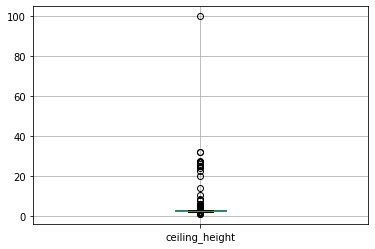

In [16]:
real_estate.boxplot('ceiling_height')

In [17]:
real_estate[real_estate['ceiling_height'] == 100]['ceiling_height'].count()

1

100 странное значение, посмотрим подробнее

In [18]:
real_estate[real_estate['ceiling_height'] == 100]

total_images  last_price  total_area first_day_exposition  rooms  \
22869             0  15000000.0        25.0  2018-07-25T00:00:00      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
22869           100.0           5.0         14.0      5             1   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
22869      False          11.0      5.0  Санкт-Петербург           34963.0   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
22869               8283.0               1.0          223.0               3.0   

       ponds_nearest  days_exposition  is_apartment_copy  
22869           30.0             19.0               True

Недвижимость является апартаментами, то есть коммерческой недвижимостью, и скорее всего такая высота потолков это опечатка, а реальная высота - 10 м, что вполне возможно для апартаментов.

In [19]:
real_estate.loc[real_estate['ceiling_height'] == 100, 'ceiling_height'] = 10

Апартаменты, как коммерческая недвижимость, может иметь более высокие потолки, чем обычные квартиры.
<br>Поэтому для апартаментов будем заполнять средним значением среди апартаментов, а для остальной недвижимости - средним значением среди обычных квартир.

In [20]:
apart = real_estate[real_estate['is_apartment'] == 1]['ceiling_height'].mean()
notapart = real_estate[real_estate['is_apartment'] != 1]['ceiling_height'].mean()
real_estate['ceiling_height'] = (
    real_estate['ceiling_height']
    .where(real_estate['is_apartment'] != 1, apart)
)
real_estate['ceiling_height'] = (
    real_estate['ceiling_height']
    .where(real_estate['is_apartment'] == 1, notapart)
)

<div class="alert alert-block alert-info">

*airports_nearest* - расстояние до ближайшего аэропорта в метрах (м)
<br>*cityCenters_nearest* - расстояние до центра города (м)
<br>*parks_nearest* - расстояние до ближайшего парка (м)
<br>*ponds_nearest* - расстояние до ближайшего водоёма (м)
<br>*parks_around3000* - число парков в радиусе 3 км 
<br>*ponds_around3000* - число водоёмов в радиусе 3 км 

</div>

Эти данные могут оставаться вещественными, не могут быть отрицательными, поэтому заменим на первое целое отрицательное - '-1', чтобы знать, что здесь были пропуски.

In [21]:
real_estate['airports_nearest'] = real_estate['airports_nearest'].fillna(value = -1)
real_estate['cityCenters_nearest'] = real_estate['cityCenters_nearest'].fillna(value = -1)
real_estate['parks_nearest'] = real_estate['parks_nearest'].fillna(value = -1)
real_estate['ponds_nearest'] = real_estate['ponds_nearest'].fillna(value = -1)
real_estate['parks_around3000'] = real_estate['parks_around3000'].fillna(value = -1)
real_estate['ponds_around3000'] = real_estate['ponds_around3000'].fillna(value = -1)

In [22]:
print ('число парков в радиусе 3 км:',
       real_estate[real_estate['ponds_around3000'] == -1]['parks_around3000'].unique())

число парков в радиусе 3 км: [-1.]


Все, кто не указали число водоёмов в радиусе 3 км, не указали и число парков в радиусе 3 км.

In [23]:
print ('расстояние до ближайшего аэропорта:',
       real_estate[real_estate['ponds_around3000'] == -1]['airports_nearest'].unique())
print ('расстояние до центра города:',
       real_estate[real_estate['ponds_around3000'] == -1]['cityCenters_nearest'].unique())
print ('расстояние до ближайшего парка:',
       real_estate[real_estate['ponds_around3000'] == -1]['parks_nearest'].unique())
print ('расстояние до ближайшего водоёма:',
       real_estate[real_estate['ponds_around3000'] == -1]['ponds_nearest'].unique())

расстояние до ближайшего аэропорта: [-1.]
расстояние до центра города: [-1.]
расстояние до ближайшего парка: [-1.]
расстояние до ближайшего водоёма: [-1.]


Все, кто не указал число водоёмов в радиусе 3 км, не указали число парков в радиусе 3 км, расстояние до ближайшего аэропорта, расстояние до центра города, расстояние до ближайшего парка и расстояние до ближайшего водоёма.

<div class="alert alert-block alert-info">

*floors_total* - всего этажей в доме
<br>*balcony* - число балконов
<br>*parks_around3000* - число парков в радиусе 3 км 
<br>*ponds_around3000* - число водоёмов в радиусе 3 км 

</div>

Все эти данные не могут быть отрицательными, но могут отсутствовать, поэтому пропуски в этих данных заменим на первое целое отрицательное - '-1'.

In [24]:
real_estate['floors_total'] = real_estate['floors_total'].fillna(value = -1)
real_estate['balcony'] = real_estate['balcony'].fillna(value = -1)
real_estate['parks_around3000'] = real_estate['parks_around3000'].fillna(value = -1)
real_estate['ponds_around3000'] = real_estate['ponds_around3000'].fillna(value = -1)

<div class="alert alert-block alert-info">

*days_exposition* - сколько дней было размещено объявление (от публикации до снятия) 

</div>

Этот столбец может иметь пропуски, потому что объявление всё ещё размещено на сайте.
<br>Тогда можно посчитать количество дней до выгрузки датафрейма (16.08.2019)

Для этого столбец *'first_day_exposition'* приведём к обычному формату даты.

In [25]:
real_estate['first_day_exposition'] = (
    pd.to_datetime(real_estate['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
)

In [26]:
end_date = "2019-08-16"
date_1 = datetime.strptime(end_date, "%Y-%m-%d")
real_estate['days_exposition'] = date_1 - real_estate['first_day_exposition']

In [27]:
print ('Доля пропущенных значений:')
(real_estate.isnull().sum() / real_estate.shape[0]).apply('{:.2%}'.format)

Доля пропущенных значений:


total_images            0.00%
last_price              0.00%
total_area              0.00%
first_day_exposition    0.00%
rooms                   0.00%
ceiling_height          0.00%
floors_total            0.00%
living_area             8.03%
floor                   0.00%
is_apartment            0.00%
studio                  0.00%
open_plan               0.00%
kitchen_area            9.61%
balcony                 0.00%
locality_name           0.00%
airports_nearest        0.00%
cityCenters_nearest     0.00%
parks_around3000        0.00%
parks_nearest           0.00%
ponds_around3000        0.00%
ponds_nearest           0.00%
days_exposition         0.00%
is_apartment_copy       0.00%
dtype: object

Все замены произведены для упрощения последующей обработки с сохранением информации об изначальном отсутствии данных.

<a id="type_data"></a>
<div class="alert alert-block alert-info">
<h2>Типы данных</h2>
</div>

Столбцы, описывающие количество этажей в доме, количество балконов, количество парков и водоёмов в радиусе 3 км и количество дней, сколько было размещено объявление, предпологают целочисленные значения.

In [28]:
real_estate['floors_total'] = real_estate['floors_total'].astype('int')
real_estate['balcony'] = real_estate['balcony'].astype('int')
real_estate['parks_around3000'] = real_estate['parks_around3000'].astype('int')
real_estate['ponds_around3000'] = real_estate['ponds_around3000'].astype('int')
real_estate['days_exposition'] = real_estate['days_exposition'].apply(lambda x: x.days)

Изменим тип данных столбцов *'studio'* и *'is_apartment_copy'* на bool, а *'is_apartment'* на int.

In [29]:
real_estate['is_apartment'] = real_estate['is_apartment'].astype('int')
real_estate['studio'] = real_estate['studio'].astype('bool')
real_estate['is_apartment_copy'] = real_estate['is_apartment_copy'].astype('bool')

In [30]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int32
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null int32
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int32
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null int32
parks_nearest           23699 non-null float64
ponds_around

In [31]:
real_estate.sample(5)

total_images  last_price  total_area first_day_exposition  rooms  \
8922              8   6900000.0        69.0           2017-05-31      3   
11482            20   5790000.0        48.0           2017-08-25      2   
3858              8   5200000.0        56.0           2019-03-16      2   
16453            16   9500000.0        93.2           2017-07-11      3   
1722              6   5900000.0        52.0           2015-11-19      2   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
8922          2.76072             4         45.3      1            -1   False   
11482         2.76072             8         27.0      3            -1   False   
3858          2.76072            18          NaN      6             0   False   
16453         2.76072            24         59.2     16            -1   False   
1722          2.76072            10         31.0      3            -1   False   

       open_plan  kitchen_area  balcony         locality_name  \
8922       False           7.0       -1       Санкт-Петербург   
11482      False           8.0        1       Санкт-Петербург   
3858       False          10.0        2  посёлок Металлострой   
16453      False          15.5        0       Санкт-Петербург   
1722       False           9.5        2       Санкт-Петербург   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
8922            19807.0               3498.0                 0           -1.0   
11482           31775.0               4322.0                 1          414.0   
3858            25268.0              26980.0                 0           -1.0   
16453           36553.0              14693.0                 0           -1.0   
1722            34446.0              11799.0                 0           -1.0   

       ponds_around3000  ponds_nearest  days_exposition  is_apartment_copy  
8922                  3          172.0              807              False  
11482                 3          363.0              721              False  
3858                  0           -1.0              153              False  
16453                 0           -1.0              766              False  
1722                  0           -1.0             1366              False

<a id="names"></a>
<div class="alert alert-block alert-info">
<h2>Названия населённых пунктов</h2>
</div>

In [32]:
print (real_estate['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Например, названия 'поселок' и 'посёлок', 'посёлок городского типа' и 'городской посёлок' это одно и то же. Нужно привезти типы населённых пунктов к единому виду.
<br>Также для многих населённых пунктов где-то указан тип, а где-то нет. Например, 'Никольское' и 'село Никольское'.
<br>Чтобы впоследствии было проще анализировать этот столбец, нужно, чтобы один и тот же населённый пункт назывался одинаково везде.

In [33]:
real_estate['locality_name'] = real_estate['locality_name'].str.replace('поселок', 'посёлок')
real_estate['locality_name'] = real_estate['locality_name'].str.replace('городской посёлок', 'посёлок городского типа')
real_estate['locality_name'] = real_estate['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')
real_estate['locality_name'] = real_estate['locality_name'].str.replace('посёлок станции', 'посёлок при железнодорожной станции')

In [34]:
locality_names = real_estate.locality_name.unique()

def count_words(arr):
    words = []

    for i in range(len(arr)):
        for j in range(len(arr[i].split())):
            words.append(arr[i].split()[j])

    from collections import Counter
    cntr = Counter(words)
    return cntr

cntr = count_words(locality_names)

for key, value in sorted(cntr.items(), key=lambda cntr: cntr[1], reverse=True):
    print (key, value)

посёлок 158
деревня 106
городского 36
типа 36
село 9
Бор 6
при 6
железнодорожной 6
станции 6
садовое 5
товарищество 5
Старая 4
Большая 3
коттеджный 3
Мурино 2
Кудрово 2
Фёдоровское 2
Новая 2
Ропша 2
Новый 2
Никольское 2
Романовка 2
Павлово 2
Рахья 2
Колпаны 2
Ладога 2
Зимитицы 2
имени 2
Рябово 2
Бегуницы 2
Малое 2
Калитино 2
Приладожский 2
Щеглово 2
Рабитицы 2
Гарболово 2
Любань 2
Красная 2
Горка 2
Громово 2
Лесное 2
Санкт-Петербург 1
Шушары 1
Янино-1 1
Парголово 1
Ломоносов 1
Сертолово 1
Петергоф 1
Пушкин 1
Коммунар 1
Колпино 1
Красный 1
Гатчина 1
Выборг 1
Кронштадт 1
Кировск 1
Новое 1
Девяткино 1
Металлострой 1
Лебяжье 1
Сиверский 1
Молодцово 1
Кузьмоловский 1
Павловск 1
Пикколово 1
Всеволожск 1
Волхов 1
Кингисепп 1
Приозерск 1
Сестрорецк 1
Куттузи 1
Аннино 1
Ефимовский 1
Плодовое 1
Заклинье 1
Торковичи 1
Первомайское 1
Красное 1
Село 1
Понтонный 1
Сясьстрой 1
Лесколово 1
Свет 1
Сланцы 1
Путилово 1
Ивангород 1
Шлиссельбург 1
Зеленогорск 1
Сосновый 1
Оржицы 1
Кальтино 1
Бугры 1
Рощино

Типы населённых пунктов.

In [35]:
for key, value in sorted(cntr.items(), key=lambda cntr: cntr[1], reverse=True):
    if key[0].islower():
        print (key, value)

посёлок 158
деревня 106
городского 36
типа 36
село 9
при 6
железнодорожной 6
станции 6
садовое 5
товарищество 5
коттеджный 3
имени 2
километр 1


По количеству встречаемости этих слов можно выделить несколько типов:

In [36]:
type_loc = ['посёлок городского типа', 'коттеджный посёлок', 'посёлок при железнодорожной станции',
            'посёлок', 'деревня', 'садовое товарищество', 'село']

Добавим столбец с типом населённого пункта

In [37]:
def loc_type(text):
    for i in range(len(type_loc)):
        if type_loc[i] in text:
            return type_loc[i]

real_estate['type_locality'] = real_estate['locality_name'].apply(loc_type)

In [38]:
name = {}
for val in real_estate[real_estate['type_locality'].isna()]['locality_name'].unique():
    name.update({val:None})


for val in real_estate[real_estate['type_locality'].notna()]['locality_name'].unique():
    for word in val.split():
        if word in name:
            name.update({word: val})

dict2 = name.copy()
for key, val in dict2.items():
    if val == None:
        name.pop(key)
print (name)

{'Мурино': 'посёлок Мурино', 'Никольское': 'село Никольское', 'Кудрово': 'деревня Кудрово', 'Любань': 'посёлок Любань'}


Узнать тип населённого пункта можно только для 4-ёх пунктов. Перепишем их в столбец *'locality_name'*.

In [39]:
for key, val in name.items():
    real_estate.loc[real_estate['locality_name'] == key, 'locality_name'] = real_estate['locality_name'].str.replace(key, val)

real_estate['type_locality'] = real_estate['locality_name'].apply(loc_type)

Добавим столбец с самими названиями населённых пунктов.

In [40]:
def loc_name(text):
    for i in range(len(type_loc)):
        if type_loc[i] in text:
            return text[len(type_loc[i]) + 1:len(text):1]
    return text

real_estate['name_locality'] = real_estate['locality_name'].apply(loc_name)

In [41]:
real_estate['name_locality'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [42]:
locality_names = real_estate.name_locality.unique()

cntr = count_words(locality_names)
for key, value in sorted(cntr.items(), key=lambda cntr: cntr[1], reverse=True):
    print (key, value)

Бор 6
Старая 4
Большая 3
Новая 2
Ропша 2
Новый 2
Романовка 2
Колпаны 2
Ладога 2
имени 2
Бегуницы 2
Малое 2
Красная 2
Горка 2
Санкт-Петербург 1
Шушары 1
Янино-1 1
Парголово 1
Мурино 1
Ломоносов 1
Сертолово 1
Петергоф 1
Пушкин 1
Кудрово 1
Коммунар 1
Колпино 1
Красный 1
Гатчина 1
Фёдоровское 1
Выборг 1
Кронштадт 1
Кировск 1
Новое 1
Девяткино 1
Металлострой 1
Лебяжье 1
Сиверский 1
Молодцово 1
Кузьмоловский 1
Павловск 1
Пикколово 1
Всеволожск 1
Волхов 1
Кингисепп 1
Приозерск 1
Сестрорецк 1
Куттузи 1
Аннино 1
Ефимовский 1
Плодовое 1
Заклинье 1
Торковичи 1
Первомайское 1
Красное 1
Село 1
Понтонный 1
Сясьстрой 1
Лесколово 1
Свет 1
Сланцы 1
Путилово 1
Ивангород 1
Шлиссельбург 1
Никольское 1
Зеленогорск 1
Сосновый 1
Оржицы 1
Кальтино 1
Бугры 1
Рощино 1
Кириши 1
Луга 1
Волосово 1
Отрадное 1
Павлово 1
Оредеж 1
Копорье 1
Молодёжное 1
Тихвин 1
Победа 1
Нурма 1
Синявино 1
Тосно 1
Стрельна 1
Бокситогорск 1
Александровская 1
Лопухинка 1
Пикалёво 1
Терволово 1
Советский 1
Подпорожье 1
Петровское 1
Токсо

In [43]:
print ('Доля неизвестных типов: {:.2%}'
       .format(real_estate[real_estate['type_locality'].isna()]['name_locality'].count() /
               real_estate.shape[0]))

Доля неизвестных типов: 83.33%


Похоже, названия населённых пунктов приведены в порядок.
<br>Столбец с типом населённого пункта сохранять нет смысла, так как слишком много пропусков, которые мы не можем заполнить правильно.

In [44]:
del real_estate['type_locality']

<a id="duplicates"></a>
<div class="alert alert-block alert-info">
<h2>Дубликаты</h2>
</div>

In [45]:
real_estate.duplicated().sum()

0

Соверешнно одинаковых строк нет.

<a id="add_columns"></a>
<div class="alert alert-block alert-info">
<h2>Добавление необходимых столбцов</h2>
</div>

<div class="alert alert-block alert-info">

- цена квадратного метра *price_square_meter*
- день недели, месяц и год публикации объявления *weekday_exposition*, *month_exposition*, *year_exposition*
- этаж, на котором расположена квартира; варианты — первый, последний, другой *floor_category*
- соотношение жилой и общей площади *planning_factor_K1*
- отношение площади кухни к общей площади *ratio_kitchen_total*

</div>

In [46]:
real_estate['price_square_meter'] = real_estate['last_price'] / real_estate['total_area']
real_estate['weekday_exposition'] = real_estate['first_day_exposition'].dt.weekday
real_estate['month_exposition'] = real_estate['first_day_exposition'].dt.month
real_estate['year_exposition'] = real_estate['first_day_exposition'].dt.year
real_estate['planning_factor_K1'] = real_estate['living_area'] / real_estate['total_area']
real_estate['ratio_kitchen_total'] = real_estate['kitchen_area'] / real_estate['total_area']

In [47]:
def floor_type(floor, max_floor):
    if floor == 1:
        return 'первый'
    elif floor == max_floor:
        return 'последний'
    elif max_floor == -1:
        return 'неизвестно'
    else:
        return 'другой'
    
real_estate['floor_category'] = real_estate.apply(lambda x: floor_type(x['floor'], x['floors_total']), axis = 1)

Теперь заменим пропуски в столбцах *'living_area'*, *'kitchen_area'*, *'planning_factor_K1'* и *'ratio_kitchen_total'* на -1 для упрощения последующего анализа.

In [48]:
real_estate['living_area'] = real_estate['living_area'].fillna(value = -1)
real_estate['kitchen_area'] = real_estate['kitchen_area'].fillna(value = -1)
real_estate['planning_factor_K1'] = real_estate['planning_factor_K1'].fillna(value = -1)
real_estate['ratio_kitchen_total'] = real_estate['ratio_kitchen_total'].fillna(value = -1)

In [49]:
real_estate.sample(5)

total_images  last_price  total_area first_day_exposition  rooms  \
13637             0   6600000.0        71.0           2019-02-10      3   
7276             15   3000000.0        34.0           2017-07-11      1   
8131              9   3600000.0        45.0           2018-09-19      2   
20249             5   6450000.0        43.0           2017-10-02      1   
458               9   4200000.0       106.0           2018-10-05      5   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
13637         2.76072            12         54.0      5            -1   False   
7276          2.76072            23         20.5     11            -1   False   
8131          2.76072             5         31.6      2            -1   False   
20249         2.76072            23         -1.0     17            -1   False   
458           2.76072             5         75.8      1            -1   False   

       open_plan  kitchen_area  balcony                    locality_name  \
13637      False           9.0       -1                  Санкт-Петербург   
7276       False          -1.0        0                  Санкт-Петербург   
8131       False           5.1        1                  Санкт-Петербург   
20249      False          -1.0        2                  Санкт-Петербург   
458        False          12.0       -1  посёлок городского типа Лебяжье   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
13637           13523.0              15567.0                 0           -1.0   
7276            21460.0              16788.0                 0           -1.0   
8131            17115.0              16118.0                 1          615.0   
20249           14184.0              11966.0                 0           -1.0   
458                -1.0                 -1.0                -1           -1.0   

       ponds_around3000  ponds_nearest  days_exposition  is_apartment_copy  \
13637                 0           -1.0              187              False   
7276                  1          170.0              766              False   
8131                  1          809.0              331              False   
20249                 0           -1.0              683              False   
458                  -1           -1.0              315              False   

         name_locality  price_square_meter  weekday_exposition  \
13637  Санкт-Петербург        92957.746479                   6   
7276   Санкт-Петербург        88235.294118                   1   
8131   Санкт-Петербург        80000.000000                   2   
20249  Санкт-Петербург       150000.000000                   0   
458            Лебяжье        39622.641509                   4   

       month_exposition  year_exposition  planning_factor_K1  \
13637                 2             2019            0.760563   
7276                  7             2017            0.602941   
8131                  9             2018            0.702222   
20249                10             2017           -1.000000   
458                  10             2018            0.715094   

       ratio_kitchen_total floor_category  
13637             0.126761         другой  
7276             -1.000000         другой  
8131              0.113333         другой  
20249            -1.000000         другой  
458               0.113208         первый

Создадим копию датафрейма, где удалим строки с пропусками, которые незначительны и не сильно уменьшат количество данных.
<br>Это были пропуски в столбцах *'floors_total'*, *'living_area'*, *'kitchen_area'*, *'locality_name'*.
<br>Но пропуски площадей в квартирах-студиях и квартирах со свободной планировкой могут быть обусловлены тем, что чёткого разделения жилая-нежилая там нет. То есть эти пропуски нужно оставить.

In [50]:
estate = real_estate.copy()

estate = estate.query('floors_total != -1')
estate = estate.query('living_area != -1 or studio == True or open_plan == True')
estate = estate.query('kitchen_area != -1 or studio == True or open_plan == True')

print ('Удалено {:.2%}'.format((100 - estate.shape[0] / real_estate.shape[0] * 100) / 100), 'объявлений.')

Удалено 10.73% объявлений.


<a id="summary_preprocessing"></a>
## Заключение по предпобработке

Доля пропущенных значений, обнаруженных в исходных данных:

Столбец|Доля пропусков
-|-
*ceiling_height*|38.80%
*floors_total*|0.36%
*living_area*|8.03%
*is_apartment*|88.29%
*kitchen_area*|9.61%
*balcony*|48.61%
*locality_name*|0.21%
*airports_nearest*|23.38%
*cityCenters_nearest*|23.29%
*parks_around3000*|23.28%
*parks_nearest*|65.91%
*ponds_around3000*|23.28%
*ponds_nearest*|61.56%
*days_exposition*|13.42%

- Все, кто не указали число водоёмов в радиусе 3 км, не указали и число парков в радиусе 3 км. И все они не указали остальные расстояния.
- Столбец *is_apartment* скопирован с заменой пропусков на False, исходя из предположения, что этот параметр означает коммерческая ли недвижимость, а люди, которые с этим не сталкивались, просто не знали, что там надо написать "нет".
- Процент пропусков по параметрам, которые будут участвовать в анализе, достаточно большой, поэтому пока никакие данные не были удалены.
- Пропуски в столбцах с жилой площадью и площадью кухни были оставлены для появления пропусков в столбцах соотношений площадей, после вычисления которых все пропуски в этих столбцах были заменены на -1, потому что площади не могут иметь отрицательные значения.
<br>

- Расстояния до аэропорта, водоёмов и парков, а также их количество, люди скорее всего поленились смотреть, посчитав не очень важными.
- Возможно, высоту потолков и площади было сложно померить. Или не все знают, что входит в жилую площадь квартиры, а что нет.
- Число дней, сколько объявление было размещено на сайте, может быть неизвестным, если оно размещено на сайте и по сей день. Пропуски заполнены вычесленным значением, сколько дней прошло со дня публикации до 16.08.2019.
<br>

- Столбцы с количеством этажей в доме, балконов и дней публикации, а также с количеством парков и водоёмов в радиусе 3 км, предпологают целые числа, так как не может быть, например, 2.5 балкона, поэтому тип данных был изменён на целочисленный. 
- Также столбцы с бинарными значениями, является ли недвижимость квартирой-студией или аппартаментами, преобразованы к бинарному типу данных.
- И столбец с первым днем публикации объявления приведён к обычному формату даты, для удобства последующего анализа.

<a id="analysis"></a>
# **Анализ**

Анализ будет проходить по данным без пропусков в стобцах *'floors_total'*, *'living_area'*, *'kitchen_area'*, *'locality_name'*.

<a id="tipical"></a>
<div class="alert alert-block alert-info">
<h2>Типичные параметры продаваемых квартир</h2>
</div>

In [51]:
# выводит рядом два графика: ящик и гистограмму
def graphics(column, nbins, title):
    gridsize = (1, 2)
    fig = plt.figure(figsize = (15, 5))

    ax1 = plt.subplot2grid(gridsize, (0, 0))
    ax1 = estate.boxplot(column, sym = '')
    
    ax2 = plt.subplot2grid(gridsize, (0, 1))
    ax2 = estate[column].hist(bins = nbins)

    ax1.set_title(title+'\n')
    ax2.set_title(title+'\n')

    plt.show()

In [52]:
# возвращает срез между 1 и 3 квартилями
def slic(column):
    first_quartile = column.describe()['25%']
    third_quartile = column.describe()['75%']
    return estate.query('@first_quartile <= @@column <= @third_quartile')

In [53]:
estate['total_area'].describe()

count    21156.000000
mean        60.222082
std         34.539042
min         14.000000
25%         40.000000
50%         52.000000
75%         69.742500
max        900.000000
Name: total_area, dtype: float64

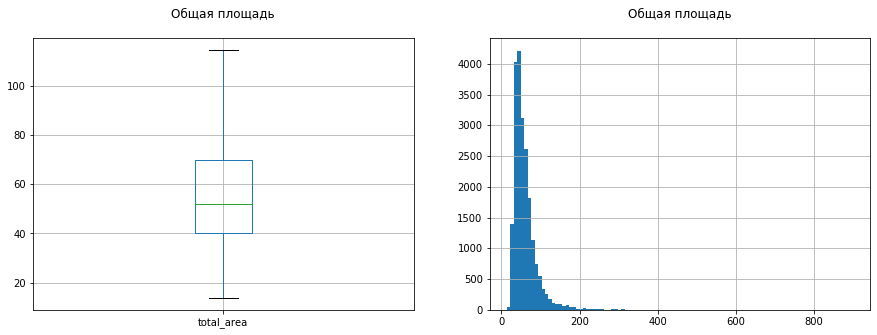

In [54]:
graphics('total_area', 100, 'Общая площадь')

In [55]:
slic(estate['total_area']).shape[0]
print ('{:.2%}'.format(slic(estate['total_area']).shape[0] / estate.shape[0]),
       'квартир имеют общую площадь от {:.1f}'.format(estate['total_area'].describe()['25%']),
       'до {:.1f}'.format(estate['total_area'].describe()['75%']), 'метров.')

51.13% квартир имеют общую площадь от 40.0 до 69.7 метров.


In [56]:
estate['rooms'].describe()

count    21156.000000
mean         2.076243
std          1.078617
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

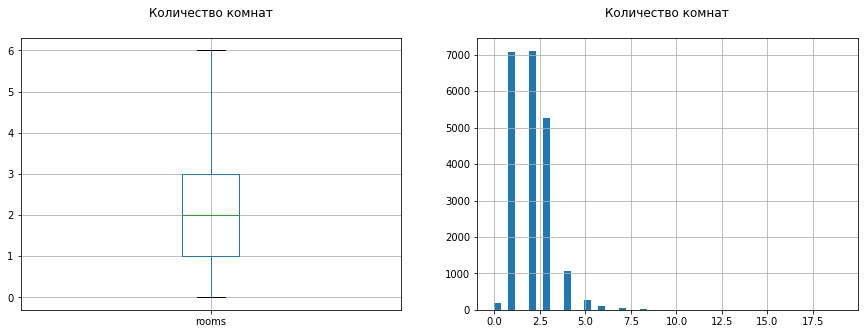

In [57]:
graphics('rooms', 50, 'Количество комнат')

In [58]:
print ('{:.2%}'.format(slic(estate['rooms']).shape[0] / estate.shape[0]),
       'квартир имеют от {:.0f}'.format(estate['rooms'].describe()['25%']),
       'по {:.0f}'.format(estate['rooms'].describe()['75%']), 'комнат.')

91.93% квартир имеют от 1 по 3 комнат.


In [59]:
estate['floor'].describe()

count    21156.000000
mean         5.862167
std          4.838122
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

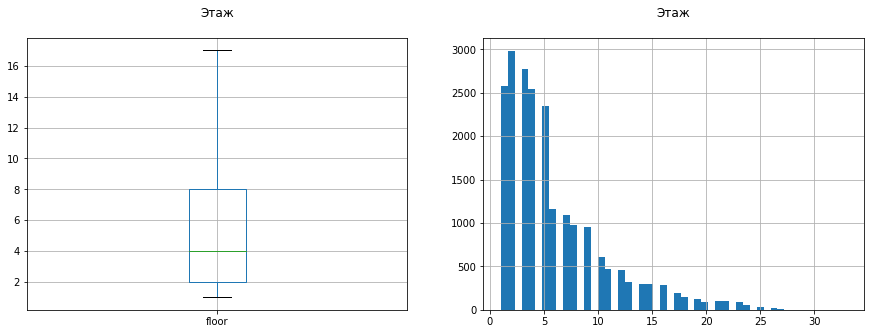

In [60]:
graphics('floor', 50, 'Этаж')

In [61]:
print ('{:.2%}'.format(slic(estate['floor']).shape[0] / estate.shape[0]),
       'квартир расположены со {:.0f}'.format(estate['floor'].describe()['25%']),
       'по {:.0f}'.format(estate['floor'].describe()['75%']), 'этаж.')

65.64% квартир расположены со 2 по 8 этаж.


studio
False    21010
True       146
dtype: int64


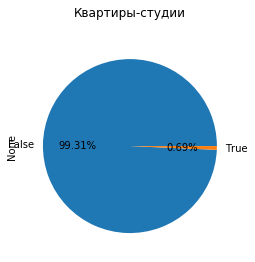

In [62]:
studio_count = estate.groupby(['studio']).size()
print (studio_count)
plt.figure(figsize = plt.figaspect(1))
plt.title('Квартиры-студии\n')
studio_count.plot(y = 'studio', kind = 'pie', autopct = '%.2f%%')
plt.show()

In [63]:
print ('{:.2%}'.format(estate.query('studio != False').shape[0] / estate.shape[0]), 'квартир-студий.')

0.69% квартир-студий.


In [64]:
estate.query('studio == True')['rooms'].unique()

array([0, 1], dtype=int64)

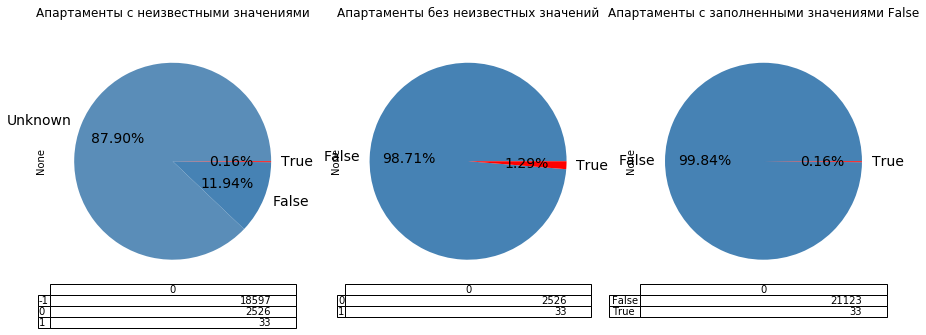

In [65]:
is_apartment_count1 = estate.groupby(['is_apartment']).size()
is_apartment_count2 = estate[estate['is_apartment'] > -1].groupby(['is_apartment']).size()
is_apartment_copy_count = estate.groupby(['is_apartment_copy']).size()
#print (is_apartment_count1)

gridsize = (1, 3)
fig = plt.figure(figsize = (15, 5))

ax1 = plt.subplot2grid(gridsize, (0, 0))
ax1 = is_apartment_count1.plot(y = 'is_apartment', kind = 'pie', autopct = '%.2f%%', fontsize = 14,
                               labels = ['Unknown', 'False', 'True'], colors = ['#5A8DB8', '#4682B4', 'r'],
                               table = is_apartment_count1)
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax2 = is_apartment_count2.plot(y = 'is_apartment', kind = 'pie', autopct = '%.2f%%', fontsize = 14,
                               labels = ['False', 'True'], colors = ['#4682B4', 'r'],
                               table = is_apartment_count2)
ax3 = plt.subplot2grid(gridsize, (0, 2))
ax3 = is_apartment_copy_count.plot(y = 'is_apartment_copy', kind = 'pie', autopct = '%.2f%%',
                                   fontsize = 14, colors = ['#4682B4', 'r'],
                                   table = is_apartment_copy_count)

ax1.set_title('Апартаменты с неизвестными значениями\n')
ax2.set_title('Апартаменты без неизвестных значений\n')
ax3.set_title('Апартаменты с заполненными значениями False\n')

plt.show()

open_plan
False    21089
True        67
dtype: int64


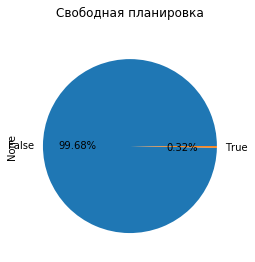

In [66]:
plan_count = estate.groupby(['open_plan']).size()
print (plan_count)
plt.figure(figsize = plt.figaspect(1))
plt.title('Свободная планировка\n')
plan_count.plot(y = 'open_plan', kind = 'pie', autopct = '%.2f%%')
plt.show()

In [67]:
print ('{:.2%}'.format(estate.query('open_plan != False').shape[0] / estate.shape[0]),
       'квартир со свободной планировкой.')

0.32% квартир со свободной планировкой.


In [68]:
print (estate.query('is_apartment_copy == True')['studio'].unique())
print (estate.query('is_apartment_copy == True')['open_plan'].unique())
print (estate.query('open_plan == True')['studio'].unique())
print (estate.query('open_plan == True')['is_apartment_copy'].unique())
print (estate.query('studio == True')['open_plan'].unique())
print (estate.query('studio == True')['is_apartment_copy'].unique())

[False]
[False]
[False]
[False]
[False]
[False]


Типы планировки не пересекаются, то есть можно записать отдельный столбец с типами планировки.

In [69]:
def plan_type(col1, col2, col3):
    if col1 == True:
        return 'studio'
    elif col2 == True:
        return 'open_plan'
    elif col3 == True:
        return 'apartment'
    else:
        return 'tipical_plan'
    
estate['type_plan'] = estate.apply(lambda x: plan_type(x['studio'], x['open_plan'], x['is_apartment_copy']), axis = 1)

type_plan
apartment     33
open_plan     67
studio       146
dtype: int64


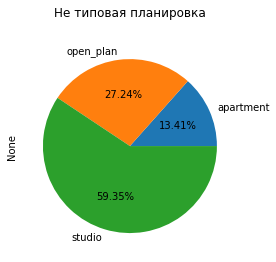

In [70]:
plan_count = estate.query('type_plan != "tipical_plan"').groupby(['type_plan']).size()
print (plan_count)
plt.figure(figsize = plt.figaspect(1))
plt.title('Не типовая планировка\n')
plan_count.plot(y = 'type_plan', kind = 'pie', autopct = '%.2f%%')
plt.show()

type_plan
apartment          33
open_plan          67
studio            146
tipical_plan    20910
dtype: int64


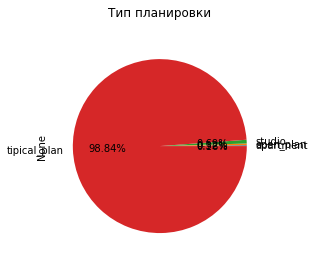

In [71]:
plan_count = estate.groupby(['type_plan']).size()
print (plan_count)
plt.figure(figsize = plt.figaspect(1))
plt.title('Тип планировки\n')
plan_count.plot(y = 'type_plan', kind = 'pie', autopct = '%.2f%%')
plt.show()

In [72]:
locality_series = estate.groupby(['name_locality'])['name_locality'].count()
locality_count = pd.DataFrame({'name_locality':locality_series.index, 'count':locality_series.values})
locality_count = locality_count.sort_values('count', ascending = False)
locality_count.head(15)

name_locality  count
212  Санкт-Петербург  14155
139           Мурино    487
102          Кудрово    400
280           Шушары    396
33        Всеволожск    363
195           Пушкин    337
86           Колпино    323
164        Парголово    293
41           Гатчина    290
34            Выборг    190
172         Петергоф    190
223       Сестрорецк    166
98      Красное Село    164
222        Сертолово    135
152  Новое Девяткино    134

В Санкт-Петербурге продают больше всего квартир. Посмотрим популярные населённые пункты Ленинградской области.

In [73]:
locality_count[locality_count['name_locality'] != 'Санкт-Петербург'].describe()

count
count  288.000000
mean    24.309028
std     64.977817
min      1.000000
25%      1.000000
50%      4.000000
75%     12.250000
max    487.000000

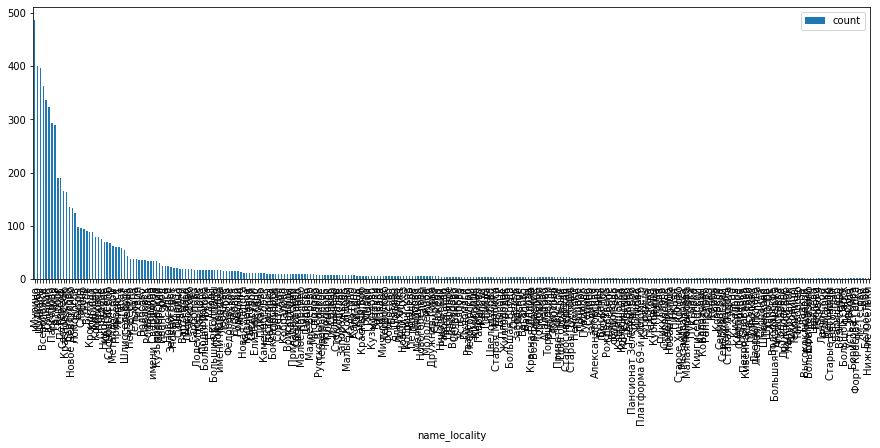

In [74]:
locality_count[locality_count['name_locality'] != 'Санкт-Петербург'].sort_values('count', ascending = False).plot(kind = 'bar', figsize = (15, 5), x = 'name_locality')

Ничего непонятно =)
<br>Возьмём населённые пункты по количеству объявлений больше 3 квартиля, потому что большинство населённых пунктов Ленинградской области имеют от 1 до 12 объявлений, но при покупке квартиры лучшее иметь выбор побольше.

In [75]:
locality_count_oblast = locality_count.query('name_locality != "Санкт-Петербург"')
third_quartile = locality_count_oblast['count'].describe()['75%']
locality_count_oblast_slice = locality_count_oblast.query('@third_quartile <= count')
print ('В', locality_count_oblast_slice.shape[0],
       'населённых пунктах Ленинградской области можно найти больше {:.0f}'.format(third_quartile),
       'объявлений о продаже квартир.')

В 72 населённых пунктах Ленинградской области можно найти больше 12 объявлений о продаже квартир.


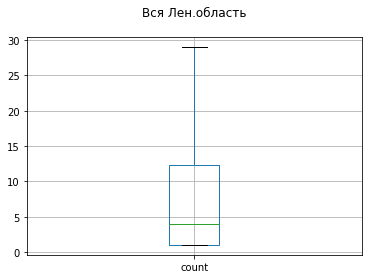

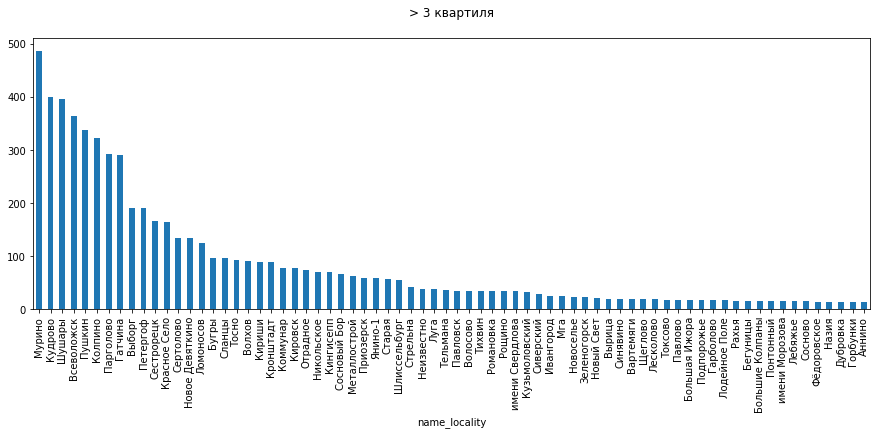

In [76]:
ax1 = locality_count_oblast.boxplot('count', sym = '')
ax2 = locality_count_oblast_slice.plot(kind = 'bar', x = 'name_locality', figsize = (15, 5), legend = False)

ax1.set_title('Вся Лен.область\n')
ax2.set_title('> 3 квартиля\n')

plt.show()

In [77]:
print ('{:.2%}'.format(estate.query('airports_nearest == -1 and cityCenters_nearest == -1 and parks_around3000 == -1 and parks_nearest == -1 and ponds_around3000 == -1 and ponds_nearest == -1').shape[0] /
                        estate.shape[0]), 'людей не указали расстояния до аэропортов, парков и водоёмов или их количество рядом.')

22.38% людей не указали расстояния до аэропортов, парков и водоёмов или их количество рядом.


In [78]:
estate

total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00           2019-03-07      3   
1                 7   3350000.0       40.40           2018-12-04      1   
2                10   5196000.0       56.00           2015-08-20      2   
4                 2  10000000.0      100.00           2018-06-19      2   
5                10   2890000.0       30.40           2018-09-10      1   
...             ...         ...         ...                  ...    ...   
23692             2   1350000.0       30.00           2017-07-07      1   
23693             9   4600000.0       62.40           2016-08-05      3   
23694             9   9700000.0      133.81           2017-03-21      3   
23695            14   3100000.0       59.00           2018-01-15      3   
23698             4   1350000.0       32.30           2017-07-21      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0             2.76072            16         51.0      8            -1   False   
1             2.76072            11         18.6      1            -1   False   
2             2.76072             5         34.3      4            -1   False   
4             2.76072            14         32.0     13            -1   False   
5             2.76072            12         14.4      5            -1   False   
...               ...           ...          ...    ...           ...     ...   
23692         2.76072             5         17.5      4            -1   False   
23693         2.76072             9         40.0      8            -1   False   
23694         2.76072             5         73.3      3            -1   False   
23695         2.76072             5         38.0      4            -1   False   
23698         2.76072             5         12.3      1            -1   False   

       open_plan  kitchen_area  balcony                    locality_name  \
0          False         25.00       -1                  Санкт-Петербург   
1          False         11.00        2                   посёлок Шушары   
2          False          8.30        0                  Санкт-Петербург   
4          False         41.00       -1                  Санкт-Петербург   
5          False          9.10       -1  посёлок городского типа Янино-1   
...          ...           ...      ...                              ...   
23692      False          6.00       -1                           Тихвин   
23693      False          8.00        0                         Петергоф   
23694      False         13.83       -1                  Санкт-Петербург   
23695      False          8.50       -1                            Тосно   
23698      False          9.00       -1              посёлок Новый Учхоз   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0               18863.0              16028.0                 1          482.0   
1               12817.0              18603.0                 0           -1.0   
2               21741.0              13933.0                 1           90.0   
4               31856.0               8098.0                 2          112.0   
5                  -1.0                 -1.0                -1           -1.0   
...                 ...                  ...               ...            ...   
23692              -1.0                 -1.0                -1           -1.0   
23693           45602.0              34104.0                 1          352.0   
23694           24665.0               4232.0                 1          796.0   
23695              -1.0                 -1.0                -1           -1.0   
23698              -1.0                 -1.0                -1           -1.0   

       ponds_around3000  ponds_nearest  days_exposition  is_apartment_copy  \
0                     2          755.0              162              False   
1                     0           -1.0              255              False   
2            

<a id="conclusion"></a>
<div class="alert alert-block alert-info">
<h3>Промежуточные выводы</h3>
</div>

параметр|типичное значение
-|-
общая площадь|40 - 69.9 (м)
количество комнат|1 - 3
этаж|2-8
студия|нет
апартаменты|нет
свободная планировка|нет

Больше всего объявлений в Санкт-Петербурге.
<br>В Ленинградской области проще всего найти квартиру (> 200 объявлений) в следующих населённых пунктах:

населённый пункт|количество объявлений
-|-
Мурино|590
Кудрово|472
Шушары|440
Всеволожск|398
Пушкин|369
Колпино|338
Парголово|327
Гатчина|307
Выборг|237
Петергоф|201

<br>В основном в населённых пунктах Ленинградской области от 1 до 12 объявлений о продаже квартиры.

In [79]:
print ('Количество квартир с типичными параметрами:',
       slic(estate['floor'])
       .query('40 <= total_area <= 69.9 and 1 <= rooms <= 3 and studio == False and is_apartment == 0 and open_plan == False')
       .shape[0])
print ('Из них',
       slic(estate['floor'])
       .query('name_locality == "Санкт-Петербург" and 40 <= total_area <= 69.9 and 1 <= rooms <= 3 and studio == False and is_apartment == 0 and open_plan == False')
       .shape[0], 'находятся в Санкт-Петербурге')

Количество квартир с типичными параметрами: 826
Из них 545 находятся в Санкт-Петербурге


<a id="timing"></a>
<div class="alert alert-block alert-info">
<h2>Время, которое объявление остаётся активным</h2>
</div>

In [80]:
estate['days_exposition'].describe()

count    21156.000000
mean       649.936472
std        368.579789
min        105.000000
25%        352.000000
50%        623.000000
75%        834.000000
max       1723.000000
Name: days_exposition, dtype: float64

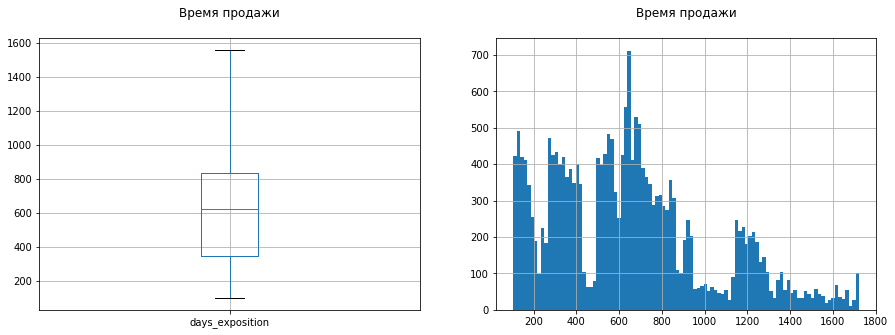

In [81]:
graphics('days_exposition', 100, 'Время продажи')

In [82]:
print ('{:.2%}'.format(slic(estate['days_exposition']).shape[0] / estate.shape[0]),
       'квартир снимаются с продажи через {:.0f}'.format(estate['days_exposition'].describe()['25%'] / 365),
       '- {:.0f}'.format(estate['days_exposition'].describe()['75%'] / 365),
       'года ({:.0f}'.format(estate['days_exposition'].describe()['25%']),
       '- {:.0f}'.format(estate['days_exposition'].describe()['75%']), 'дней).')

50.07% квартир снимаются с продажи через 1 - 2 года (352 - 834 дней).


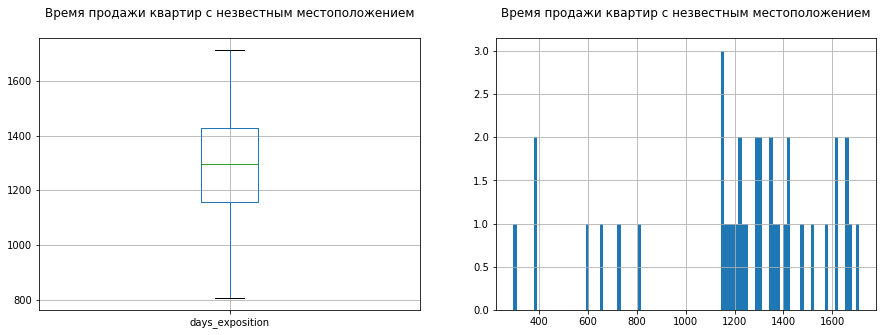

In [83]:
gridsize = (1, 2)
fig = plt.figure(figsize = (15, 5))

ax1 = plt.subplot2grid(gridsize, (0, 0))
ax1 = estate.query('name_locality == "Неизвестно"').boxplot('days_exposition', sym = '')

ax2 = plt.subplot2grid(gridsize, (0, 1))
ax2 = estate.query('name_locality == "Неизвестно"')['days_exposition'].hist(bins = 100)

ax1.set_title('Время продажи квартир с незвестным местоположением\n')
ax2.set_title('Время продажи квартир с незвестным местоположением\n')

plt.show()

In [84]:
print ('Квартиры с неизвестным расположением в основном снимаются с продажи через {:.0f}'.format(estate.query('name_locality == "Неизвестно"')['days_exposition'].describe()['25%'] / 365),
       '- {:.0f}'.format(estate.query('name_locality == "Неизвестно"')['days_exposition'].describe()['75%'] / 365),
       'года ({:.0f}'.format(estate.query('name_locality == "Неизвестно"')['days_exposition'].describe()['25%']),
       '- {:.0f}'.format(estate.query('name_locality == "Неизвестно"')['days_exposition'].describe()['75%']), 'дней).')

Квартиры с неизвестным расположением в основном снимаются с продажи через 3 - 4 года (1159 - 1426 дней).


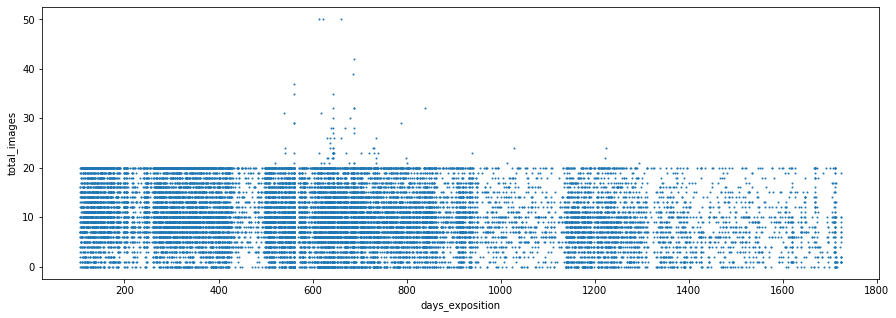

In [85]:
estate.plot(y = 'total_images', x = 'days_exposition', kind = 'scatter', figsize = (15, 5), s = 1)

<a id="anomalies"></a>
<div class="alert alert-block alert-info">
<h2>Исключение необычных параметров</h2>
</div>

In [86]:
estate.query('studio == True')['kitchen_area'].unique()

array([-1.])

In [87]:
estate.query('open_plan == True')['kitchen_area'].unique()

array([-1.])

In [88]:
estate.query('studio == True')['living_area'].unique()

array([15.5 , 24.75, -1.  , 17.5 , 12.  , 17.  , 18.  , 20.  , 16.  ,
       17.38, 15.9 , 22.  , 15.  , 14.6 , 17.08, 20.46, 21.  , 19.  ,
       19.9 , 50.  , 20.5 , 19.03, 17.6 , 12.7 , 25.  , 17.85, 14.  ,
       16.7 , 29.9 , 15.8 , 10.  , 24.42, 18.9 , 17.4 , 32.2 , 17.2 ,
       14.2 , 16.6 , 18.3 , 13.  , 22.3 , 14.1 , 33.  , 16.68, 13.56,
       26.  , 28.2 , 18.6 , 16.1 , 19.2 , 18.7 , 15.78, 17.8 , 30.  ,
       23.2 , 22.9 , 17.9 ,  5.  , 21.3 , 21.6 , 18.1 , 19.8 , 18.8 ,
       60.5 , 10.94, 18.44, 23.6 , 68.  , 18.5 ,  2.  , 19.6 , 23.3 ,
       14.25, 13.54, 16.8 , 18.2 ])

In [89]:
estate.query('open_plan == True')['living_area'].unique()

array([17. , 24.3, -1. , 15. , 18. , 17.4, 10.5, 18.7, 18.6, 23.4, 17.8,
       19. , 25.5, 25.7, 48. , 30. , 13. , 18.2, 25. , 15.5, 14. , 12. ,
       20. , 24.2, 37.6, 15.2, 18.1, 21.8, 21.4, 16.9, 16. , 71.3, 18.5,
       24. ])

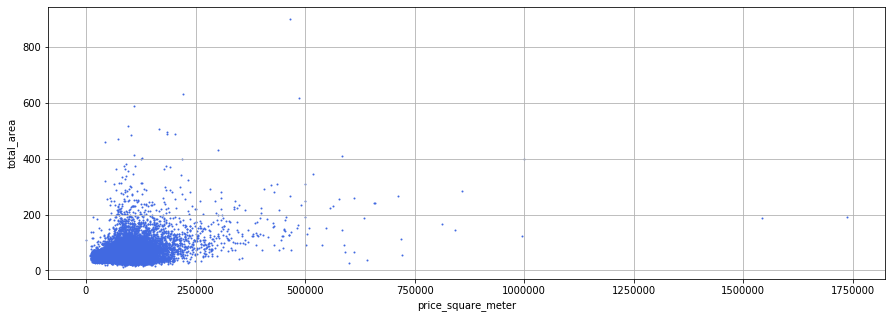

In [90]:
estate.plot(kind = 'scatter', x = 'price_square_meter', y = 'total_area',
            figsize = (15, 5), color = '#4169E1', s = 1, alpha = 1, grid = True)

Цена за квадратный метр не должна сильно зависеть от общей площади.

Определим аномальные значения по пределам 4 квартилей. И оставим неизвестные площади для квартир-студий и квартир со свободной планировкой.

In [91]:
def slic_moustache(data, column):
    first_quartile = column.describe()['25%']
    third_quartile = column.describe()['75%']
    iqr = third_quartile - first_quartile
    min_quart = first_quartile - 1.5 * iqr
    if min_quart < 0:
        min_quart = 0
    max_quart = third_quartile + 1.5 * iqr
    return data.query('@min_quart <= @@column <= @max_quart')

In [92]:
def slic_moustache_with_studio(data, column):
    first_quartile = column.describe()['25%']
    third_quartile = column.describe()['75%']
    iqr = third_quartile - first_quartile
    min_quart = -1
    max_quart = third_quartile + 1.5 * iqr
    return data.query('@min_quart <= @@column <= @max_quart')

Исключим объявления с очень высокой ценой.
<br>Площадь в 900 квадратных метров тоже выглядит аномальной.
<br>Как и 19 комнат, слишком большие жилая площадь и площадь кухни.
<br>Также исключим объявления с неизвестными площадями.

In [93]:
tipical_estate = slic_moustache(estate, estate['last_price'])
tipical_estate = slic_moustache(tipical_estate, tipical_estate['total_area'])
tipical_estate = slic_moustache_with_studio(tipical_estate, tipical_estate['living_area'])
tipical_estate = slic_moustache_with_studio(tipical_estate, tipical_estate['kitchen_area'])

И уберём объявления с неизвестным расположением.

In [94]:
tipical_estate = tipical_estate.query('name_locality != "Неизвестно"')

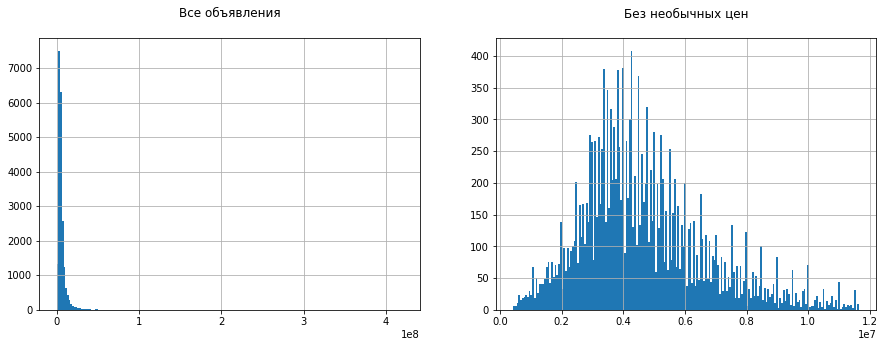

In [95]:
gridsize = (1, 2)
fig = plt.figure(figsize = (15, 5))

ax1 = plt.subplot2grid(gridsize, (0, 0))
ax1 = estate['last_price'].hist(bins = 200)

ax2 = plt.subplot2grid(gridsize, (0, 1))
ax2 = tipical_estate['last_price'].hist(bins = 200)

ax1.set_title('Все объявления\n')
ax2.set_title('Без необычных цен\n')

plt.show()

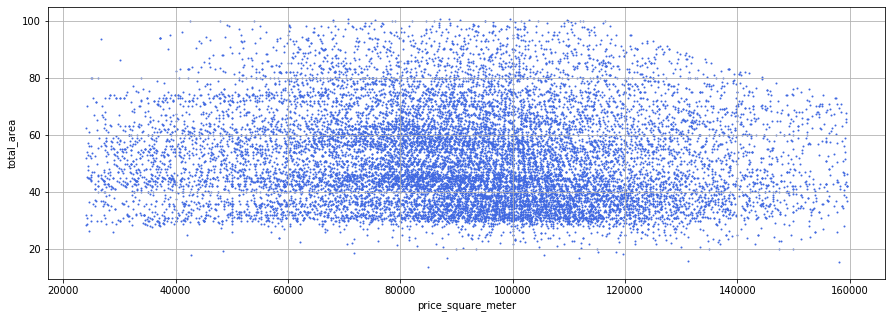

In [96]:
tipical_estate = slic_moustache(tipical_estate, tipical_estate['price_square_meter'])
tipical_estate.plot(kind = 'scatter', x = 'price_square_meter', y = 'total_area',
                    figsize = (15, 5), color = '#4169E1', s = 1, alpha = 1, grid = True)

In [97]:
tipical_estate.describe()

total_images    last_price    total_area         rooms  ceiling_height  \
count  17824.000000  1.782400e+04  17824.000000  17824.000000    17824.000000   
mean       9.842460  4.679048e+06     51.591418      1.896320        2.762242   
std        5.503558  1.965850e+06     16.346945      0.871294        0.047889   
min        0.000000  6.500000e+05     14.000000      0.000000        2.760720   
25%        6.000000  3.300000e+06     38.597500      1.000000        2.760720   
50%        9.000000  4.300000e+06     48.000000      2.000000        2.760720   
75%       14.000000  5.700000e+06     62.000000      3.000000        2.760720   
max       39.000000  1.165000e+07    100.400000      6.000000        4.268409   

       floors_total   living_area         floor  is_apartment  kitchen_area  \
count  17824.000000  17824.000000  17824.000000  17824.000000  17824.000000   
mean      10.725987     29.738864      5.856037     -0.879208      8.910552   
std        6.529669     12.026027      4.816352      0.328979      2.891150   
min        1.000000     -1.000000      1.000000     -1.000000     -1.000000   
25%        5.000000     18.000000      2.000000     -1.000000      7.000000   
50%        9.000000     29.000000      4.000000     -1.000000      8.600000   
75%       16.000000     38.800000      8.000000     -1.000000     10.700000   
max       60.000000     69.700000     30.000000      1.000000     17.000000   

            balcony  airports_nearest  cityCenters_nearest  parks_around3000  \
count  17824.000000      17824.000000         17824.000000      17824.000000   
mean       0.175606      21875.478905         11602.374944          0.164666   
std        1.312574      16892.901205          9914.188078          0.929233   
min       -1.000000         -1.000000            -1.000000         -1.000000   
25%       -1.000000       8344.250000          2020.000000          0.000000   
50%        0.000000      20558.000000         12017.000000          0.000000   
75%        1.000000      35003.000000         15711.250000          1.000000   
max        5.000000      84869.000000         65968.000000          3.000000   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
count   17824.000000      17824.000000   17824.000000     17824.000000   
mean      148.474192          0.268346     188.188117       640.516102   
std       284.830472          1.044633     304.458553       359.309902   
min        -1.000000         -1.000000      -1.000000       105.000000   
25%        -1.000000          0.000000      -1.000000       350.000000   
50%        -1.000000          0.000000      -1.000000       618.000000   
75%       238.000000          1.000000     359.000000       823.000000   
max      3190.000000          3.000000    1344.000000      1723.000000   

       price_square_meter  weekday_exposition  month_exposition  \
count        17824.000000        17824.000000      17824.000000   
mean         91398.614385            2.556329          6.420108   
std          26107.312560            1.786749          3.465949   
min          24038.461538            0.000000          1.000000   
25%          75170.160018            1.000000          3.000000   
50%          92391.304348            3.000000          6.000000   
75%         108257.115851            4.000000         10.000000   
max         159523.809524            6.000000         12.000000   

       year_exposition  planning_factor_K1  ratio_kitchen_total  
count     17824.000000        17824.000000         17824.000000  
mean       2017.377917            0.565890             0.171083  
std           1.017557            0.105828             0.140652  
min        2014.000000           -1.000000            -1.000000  
25%        2017.000000            0.500000             0.134328  
50%        2017.000000            0.569189             0.171875  
75%        2018.000000            0.636364             0.227590  
max        2019.000000            1.000000   

In [98]:
print ('Осталось {:.2%}'.format(tipical_estate.shape[0] / estate.shape[0]), 'объявлений.')

Осталось 84.25% объявлений.


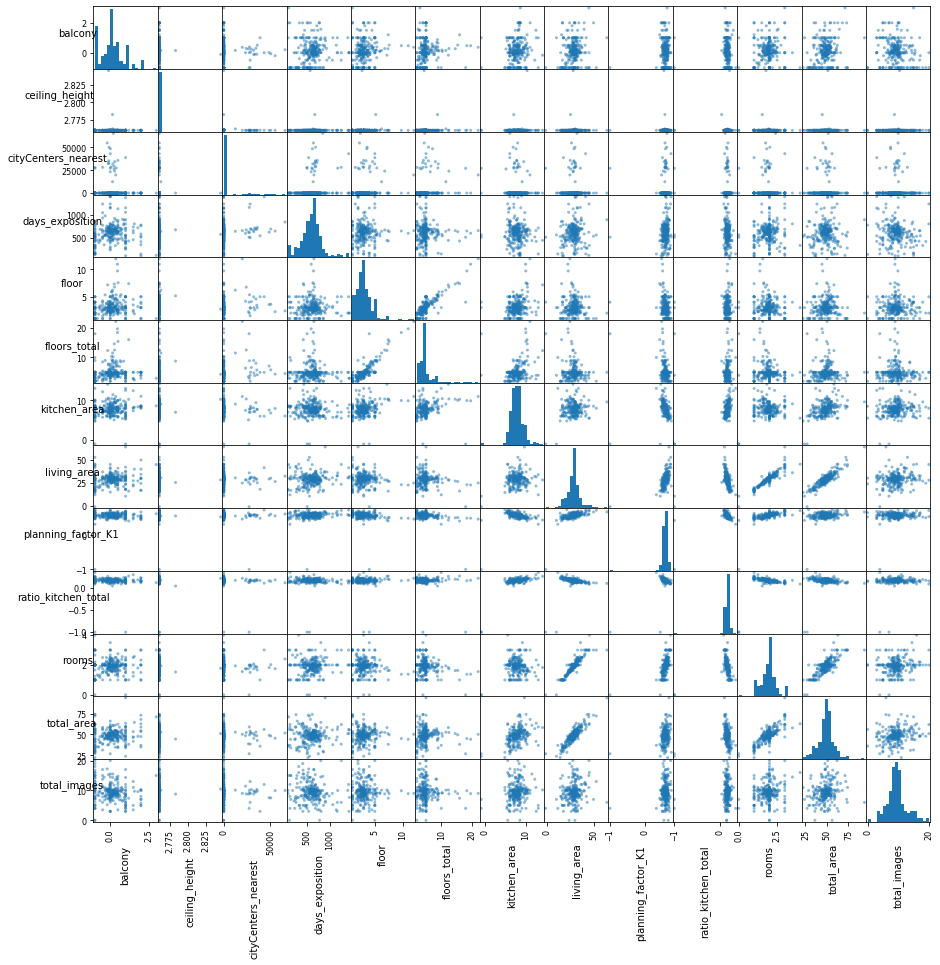

In [99]:
estate_query1 = tipical_estate.pivot_table(index = 'name_locality', values = ['rooms', 'cityCenters_nearest',
                                                                              'total_images', 'days_exposition',
                                                                              'floor', 'total_area', 'balcony',
                                                                              'planning_factor_K1',
                                                                              'ratio_kitchen_total',
                                                                            'ceiling_height', 'floors_total',
                                                                             'living_area', 'kitchen_area'],
                                           aggfunc = 'mean')

scat_mat = pd.plotting.scatter_matrix(estate_query1, figsize = (15, 15), hist_kwds = {'bins': 20})
for ax in scat_mat.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)
plt.show()

In [100]:
estate_query1.corr().style.background_gradient()

Видно, что зависимости есть только между площадями и количеством комнат, а также, очевидно, этаж не может быть выше количества этажей в доме.

Ещё раз выделим 10 населённых пунктов с наибольшим количеством объявлений, но уже с типичными параметрами.

In [101]:
locality_series_tip = tipical_estate.groupby(['name_locality'])['name_locality'].count()
locality_count_tip = pd.DataFrame({'name_locality':locality_series_tip.index, 'count':locality_series_tip.values})
locality_count_tip = locality_count_tip.sort_values('count', ascending = False)
locality_count_tip.head(10)

name_locality  count
187  Санкт-Петербург  11381
122           Мурино    468
242           Шушары    385
88           Кудрово    366
27        Всеволожск    349
73           Колпино    311
170           Пушкин    287
143        Парголово    280
34           Гатчина    278
150         Петергоф    180

<a id="factors"></a>
<div class="alert alert-block alert-info">
<h2>Факторы, влияющие на стоимость</h2>
</div>

In [102]:
# boxplot цены за квартиру по группам 
def box_price(data, column, group, title):
    box = data.boxplot(column = column,
                         by = group, grid = True,
                         figsize = (15, 5), sym = '')
    plt.title('')
    plt.figtext(.5, 1, title, fontsize = 20, ha = 'center')
    plt.show()

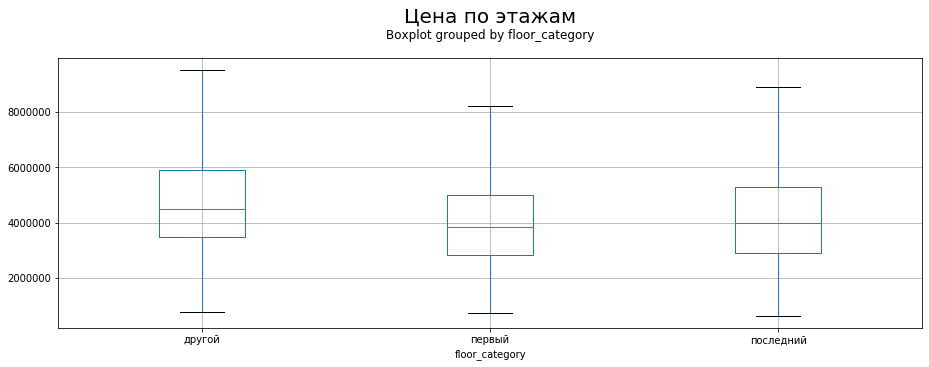

In [103]:
box_price(tipical_estate, 'last_price',
          'floor_category', 'Цена по этажам')

Первый и последний этажи дешевле других.
<br>Это может быть связано с тем, что люди, как правило, не хотят жить на первом этаже, потому что
- это увеличивает вероятность влезания воров - надо ставить решётки, а это дополнительные затраты,
- в окна первых этажей очень легко заглянуть, что немного уменьшает внутренее чувство уединения,
- в большинстве домов у первых этажей нет балконов, что может оказаться важным для курильщиков или исключает возможность сушки белья на улице и уменьшает площадь, куда можно сложить редкоиспользуемые вещи.

<br>А также не хотят жить на последнем этаже, потому что
- слишком высоко, а не во всех домах есть лифты, но даже если есть, они могут ломаться,
- крыши могут протекать в демисезонье, слишком сильно греются летом, тогда в квартирах очень жарко,
- дотсаточно шумно, потому что регулярно проводятся кровельные работы и очень близко находятся лифтовые механизмы,
- в домах выше 20 этажей из-за ветра трудно открывать окна,
- опять-таки, как ни странно, но последние этажи уменьшают чувство уединения, потому что на лестниы последних этажей часто ходят подростки потусоваться или пролезть на крышу.

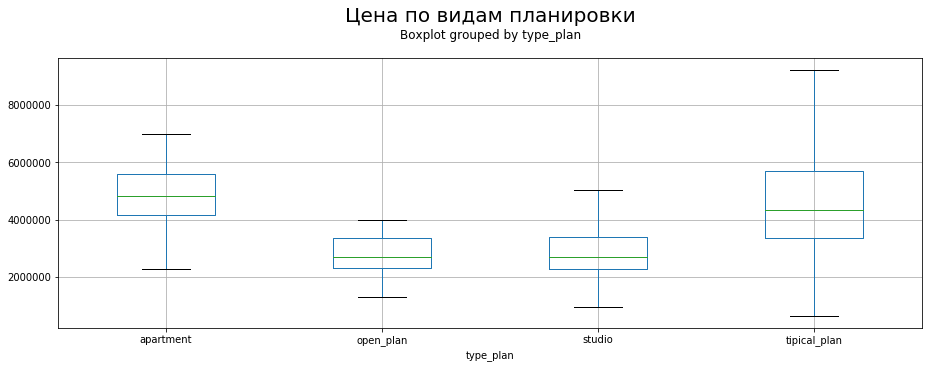

In [104]:
box_price(tipical_estate, 'last_price', 'type_plan', 'Цена по видам планировки')

Квартиры-студии и квартиры свободной планировки стоят дешевле.
<br>Возможно, для возможности перепланировки внутри таких квартир нет несущих стен, то есть, если стены и есть, то они "межкомнатные", более того, их было бы логично ставить из достаточно дешёвых материалов, потому что скорее всего жильцы их всё равно снесут и сделают, как им удобно. К тому же, дома с такими квартирами проще планировать - по большей части достаточно разделить всю площадь основания дома на прямоугольники и, как и в любом другом случае, учесть лестничные проёмы. То есть сама себестоимость этих квартир, скорее всего, ниже.

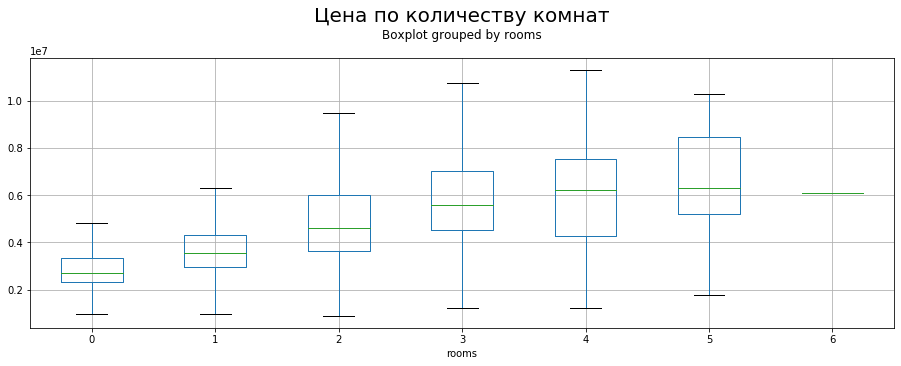

In [105]:
box_price(tipical_estate, 'last_price',
          'rooms', 'Цена по количеству комнат')

Чем меньше комнат, тем меньше стоимость квартиры в целом. Скорее всего, чем меньше комнат, тем меньше общая площадь.

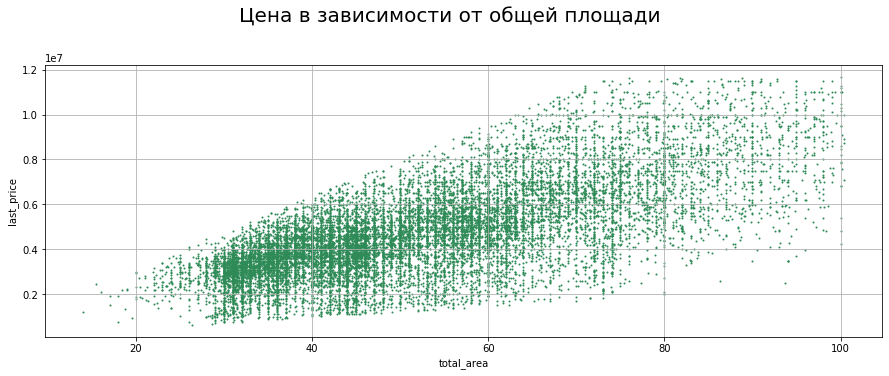

In [106]:
tipical_estate.plot(kind = 'scatter', x = 'total_area', y = 'last_price',
            figsize = (15, 5), color = '#2E8B57', s = 1, alpha = 1, grid = True)
plt.figtext(.5, 1, 'Цена в зависимости от общей площади', fontsize = 20, ha = 'center')
plt.show()

Чем больше площадь квартиры, тем выше её цена.

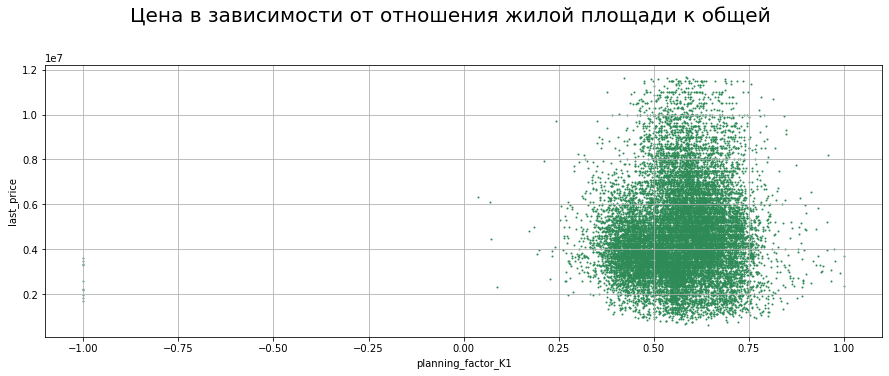

In [107]:
tipical_estate.plot(kind = 'scatter', x = 'planning_factor_K1', y = 'last_price',
            figsize = (15, 5), color = '#2E8B57', s = 1, alpha = 1, grid = True)
plt.figtext(.5, 1, 'Цена в зависимости от отношения жилой площади к общей', fontsize = 20, ha = 'center')
plt.show()

Цена квартир не зависит от отношения жилой площади к общей.

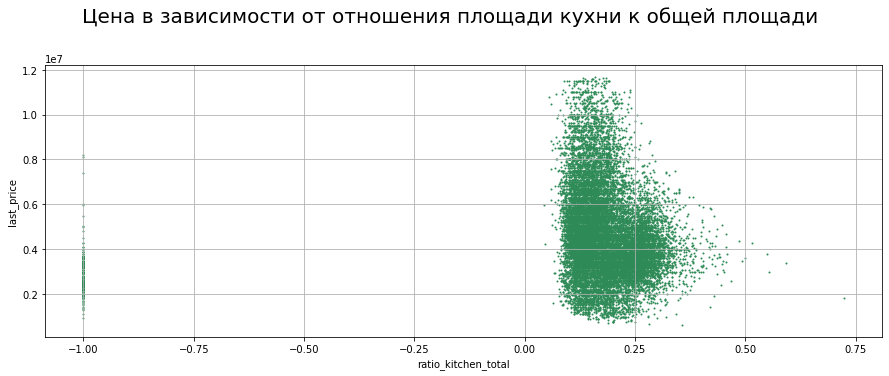

In [108]:
tipical_estate.plot(kind = 'scatter', x = 'ratio_kitchen_total', y = 'last_price',
            figsize = (15, 5), color = '#2E8B57', s = 1, alpha = 1, grid = True)
plt.figtext(.5, 1, 'Цена в зависимости от отношения площади кухни к общей площади', fontsize = 20, ha = 'center')
plt.show()

Цена квартир не зависит от отношения площади кухни к общей площади.

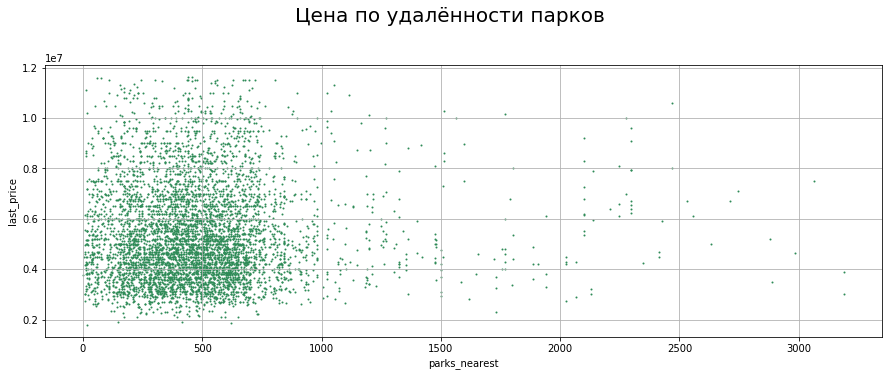

In [109]:
tipical_estate.query('parks_nearest > -1').plot(kind = 'scatter', x = 'parks_nearest', y = 'last_price',
            figsize = (15, 5), color = '#2E8B57', s = 1, alpha = 1, grid = True)
plt.figtext(.5, 1, 'Цена по удалённости парков', fontsize = 20, ha = 'center')
plt.show()

Чёткой зависимости цены от удалённости парков нет. В равной удалённости от парков есть и дорогие и дешёвые квартиры.

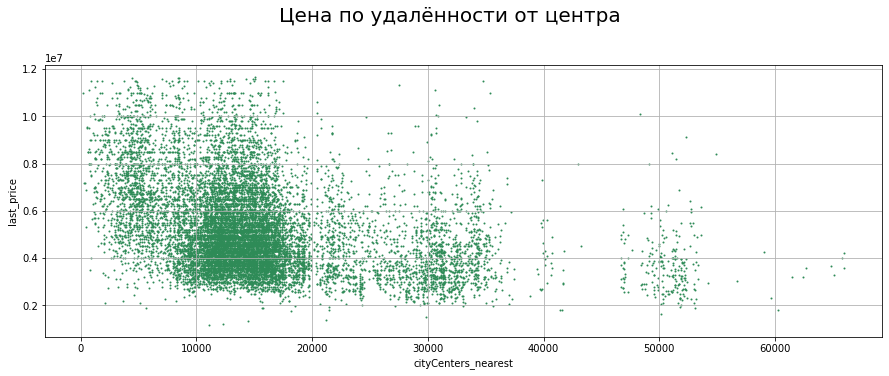

In [110]:
tipical_estate.query('cityCenters_nearest > -1').plot(kind = 'scatter', x = 'cityCenters_nearest', y = 'last_price',
            figsize = (15, 5), color = '#2E8B57', s = 1, alpha = 1, grid = True)
plt.figtext(.5, 1, 'Цена по удалённости от центра', fontsize = 20, ha = 'center')
plt.show()

Можно предполагать, что, чем дальше квартира от центра, тем меньше будет цена, но чёткой зависимости снова нет.

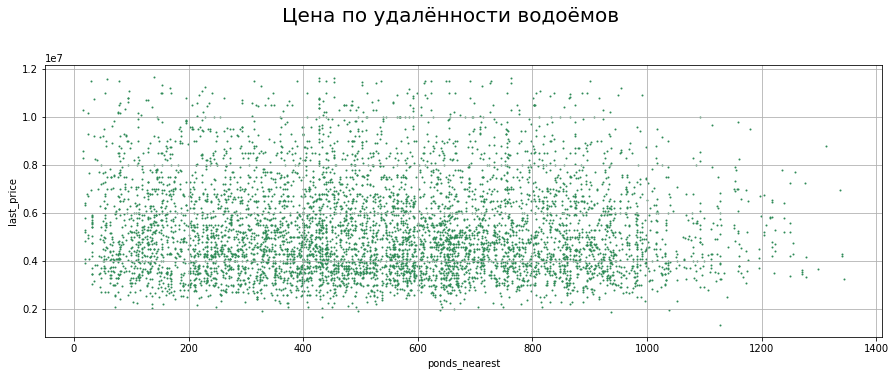

In [111]:
tipical_estate.query('ponds_nearest > -1').plot(kind = 'scatter', x = 'ponds_nearest', y = 'last_price',
            figsize = (15, 5), color = '#2E8B57', s = 1, alpha = 1, grid = True)
plt.figtext(.5, 1, 'Цена по удалённости водоёмов', fontsize = 20, ha = 'center')
plt.show()

Цена квартир не зависит от удалённости от водоёмов.

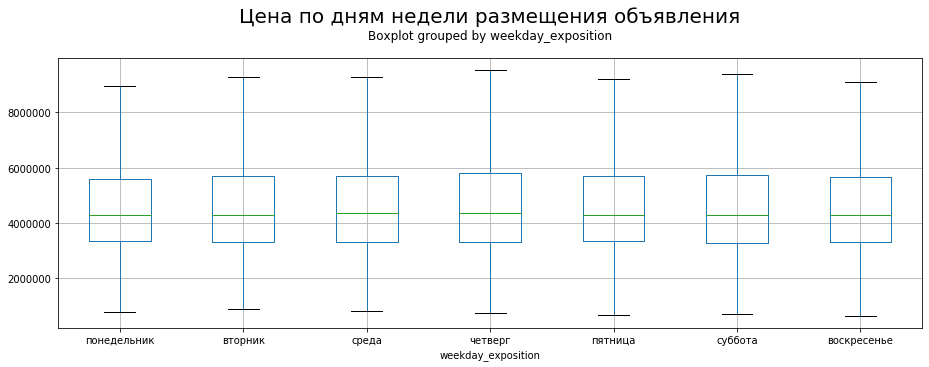

In [112]:
ax = tipical_estate.boxplot(column = 'last_price',
                            by = 'weekday_exposition', grid = True,
                            figsize = (15, 5), sym = '')
plt.title('')
plt.figtext(.5, 1, 'Цена по дням недели размещения объявления', fontsize = 20, ha = 'center')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[:] = ['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']
ax.set_xticklabels(labels)

plt.show()

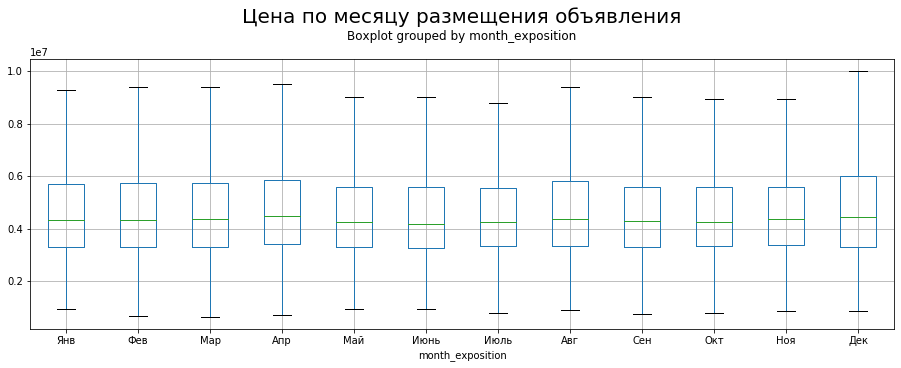

In [113]:
ax = tipical_estate.boxplot(column = 'last_price',
                            by = 'month_exposition', grid = True,
                            figsize = (15, 5), sym = '')
plt.title('')
plt.figtext(.5, 1, 'Цена по месяцу размещения объявления', fontsize = 20, ha = 'center')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[:] = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июнь', 'Июль', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']
ax.set_xticklabels(labels)

plt.show()

Цена квартир не зависит от дня недели и месяца размещения объявления.

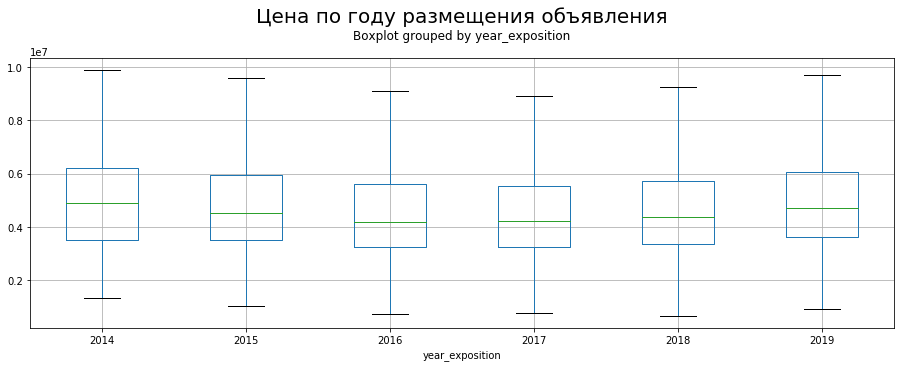

In [114]:
box_price(tipical_estate, 'last_price',
          'year_exposition', 'Цена по году размещения объявления')

Цена квартиры практически не изменилась с 2014 года. В 2016-2017 годах квартиры в среднем были немного дешевле.

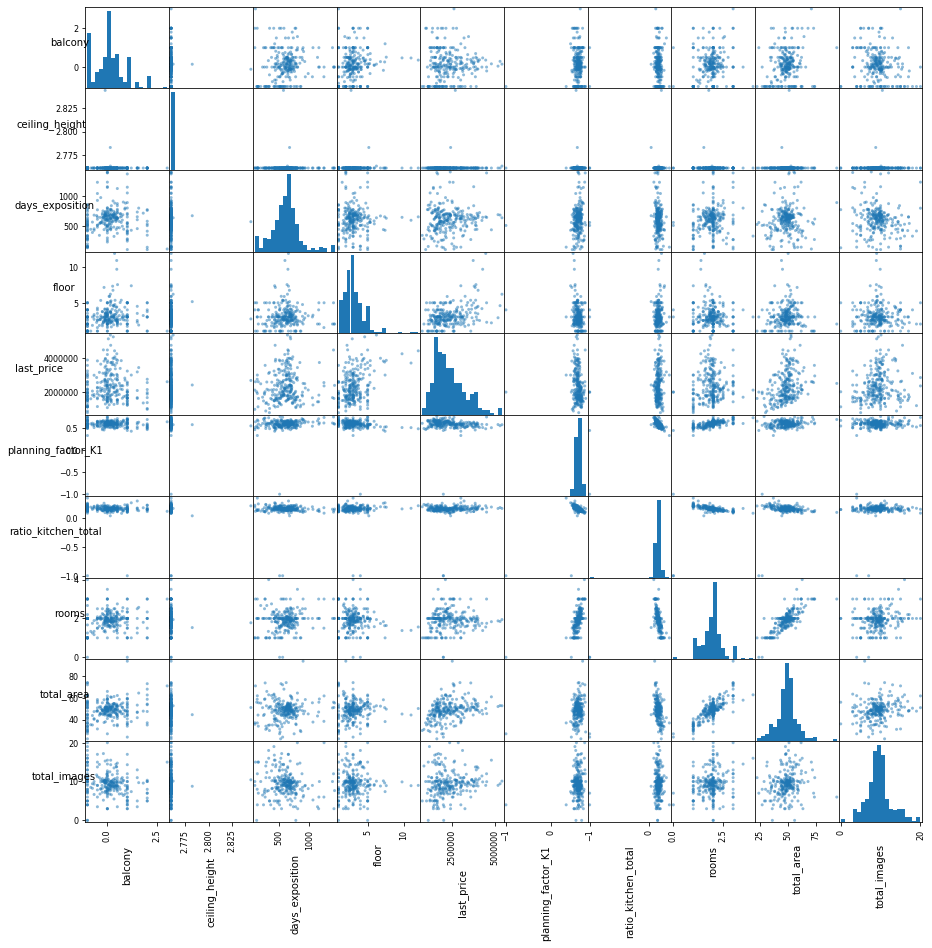

In [115]:
estate_price = tipical_estate.pivot_table(index = 'name_locality', values = ['rooms', 'total_images', 'days_exposition',
                                                                          'floor', 'total_area', 'balcony',
                                                                              'planning_factor_K1',
                                                                              'ratio_kitchen_total',
                                                                            'ceiling_height',
                                                                             'last_price'],
                                           aggfunc = 'mean')

scat_mat = pd.plotting.scatter_matrix(estate_price, figsize = (15, 15), hist_kwds = {'bins': 20})
for ax in scat_mat.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)
plt.show()

In [116]:
estate_price.corr().style.background_gradient()

Похоже, цена немного зависит от этажа и общей площади, но не сильно.

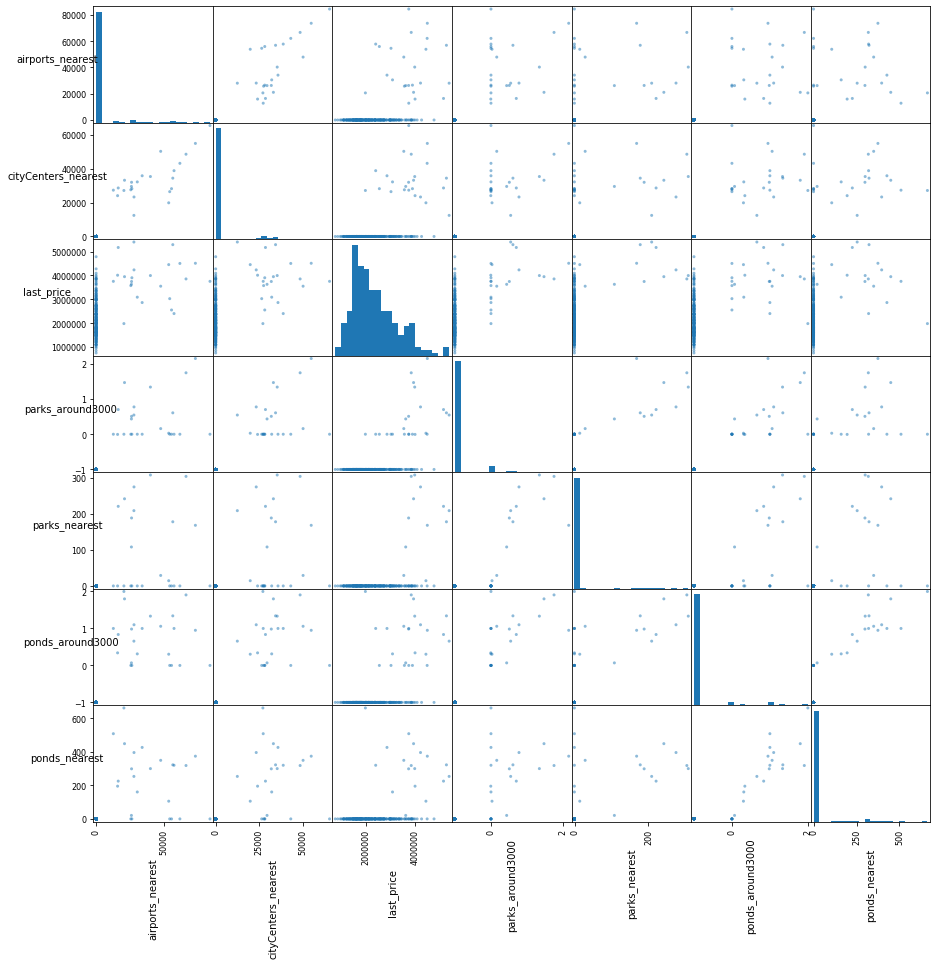

In [117]:
estate_price_infr = tipical_estate.pivot_table(index = 'name_locality', values = ['airports_nearest',
                                                                                  'cityCenters_nearest',
                                                                                  'parks_around3000',
                                                                                  'parks_nearest',
                                                                                  'ponds_around3000',
                                                                                  'ponds_nearest',
                                                                                  'last_price'],
                                               aggfunc = 'mean')

scat_mat = pd.plotting.scatter_matrix(estate_price_infr, figsize = (15, 15), hist_kwds = {'bins': 20})
for ax in scat_mat.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)
plt.show()

In [118]:
estate_price_infr.corr().style.background_gradient()

Данных о расстояниях достаточно мало. Цена квартиры не зависит от удалённости аэропорта, парков и водоёмов.

<a id="price"></a>
<div class="alert alert-block alert-info">
<h2>Цена квадратного метра</h2>
</div>

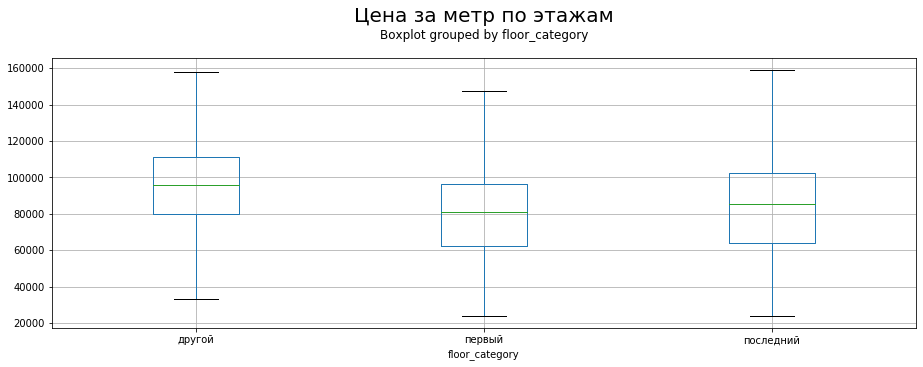

In [119]:
box_price(tipical_estate.query('floor_category != "неизвестно"'), 'price_square_meter',
          'floor_category', 'Цена за метр по этажам')

Метры на первом и последнем этажах дешевле, чем на других.

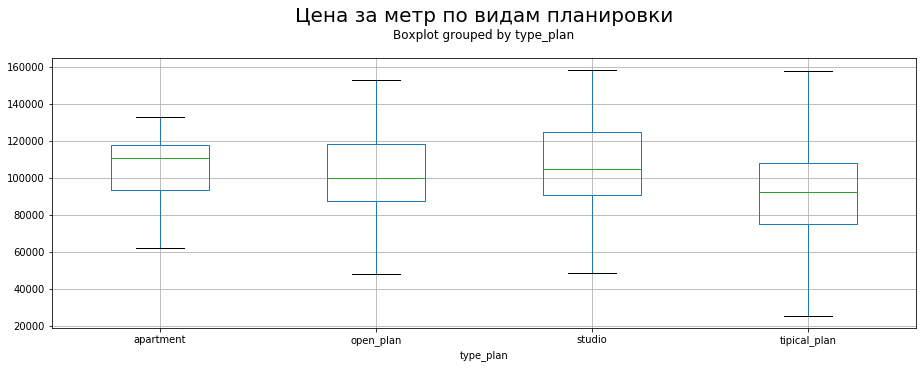

In [120]:
box_price(tipical_estate, 'price_square_meter', 'type_plan', 'Цена за метр по видам планировки')

Цена за квадратный метр в квартирах типовой планировки меньше, чем в квартирах-студиях или со свободной планировкой.
<br>Возможно, общая стоимость квартир типовой планировки складывается из чего-то ещё.

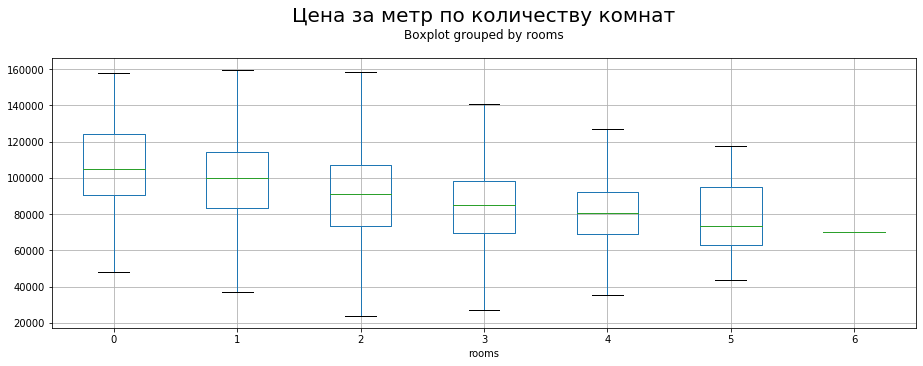

In [121]:
box_price(tipical_estate, 'price_square_meter', 'rooms', 'Цена за метр по количеству комнат')

Чем меньше комнат, тем выше цена за квадратный метр.
Это связано с тем, что чем больше комнат, тем больше площадь квартиры в целом, то есть разница та же, что и в случае покупки "оптом" и "в розницу".
Достаточно странно, что эта закономерность сохраняется для квартир с 4 и более комнатами, потому что такое количество комнат характерно для домов, находящихся в элитных районах или жилых комплексах, где в стоимость квартиры включены инфраструктура и дополнительные плюсы жилья повышанной комфортности.

In [122]:
tipical_estate.query('rooms >= 4')['cityCenters_nearest'].describe()

count      519.000000
mean     10437.930636
std       8993.605456
min         -1.000000
25%       3446.000000
50%      11347.000000
75%      14516.000000
max      51677.000000
Name: cityCenters_nearest, dtype: float64

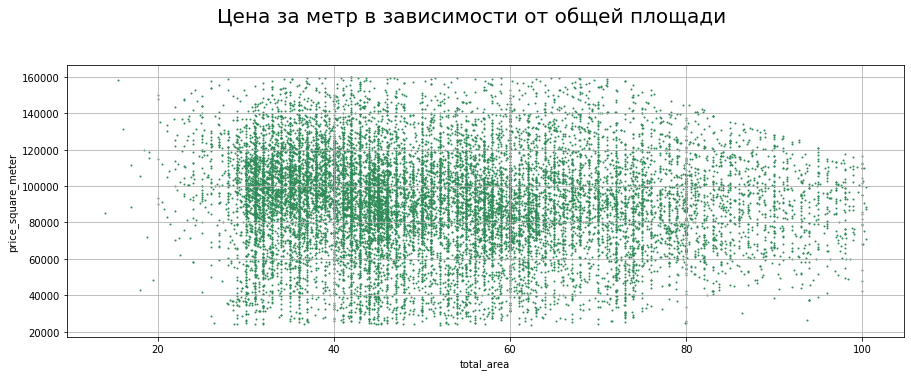

In [123]:
tipical_estate.plot(kind = 'scatter', x = 'total_area', y = 'price_square_meter',
            figsize = (15, 5), color = '#2E8B57', s = 1, alpha = 1, grid = True)
plt.figtext(.5, 1, 'Цена за метр в зависимости от общей площади', fontsize = 20, ha = 'center')
plt.show()

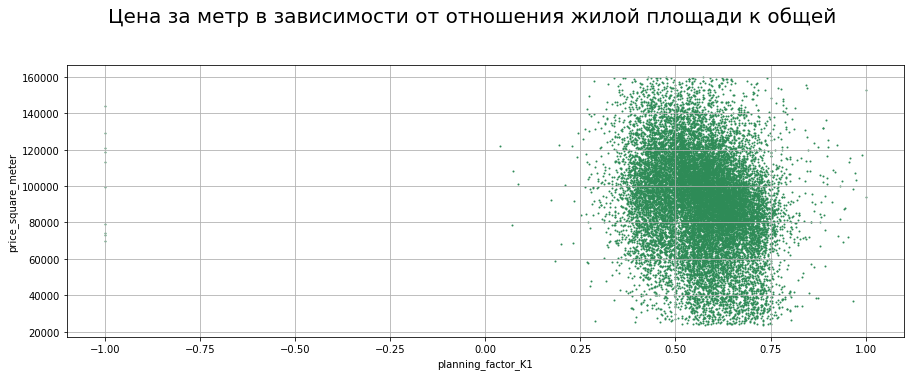

In [124]:
tipical_estate.plot(kind = 'scatter', x = 'planning_factor_K1', y = 'price_square_meter',
            figsize = (15, 5), color = '#2E8B57', s = 1, alpha = 1, grid = True)
plt.figtext(.5, 1, 'Цена за метр в зависимости от отношения жилой площади к общей', fontsize = 20, ha = 'center')
plt.show()

Цена квадратного метра не зависит от отношения жилой площади к общей.

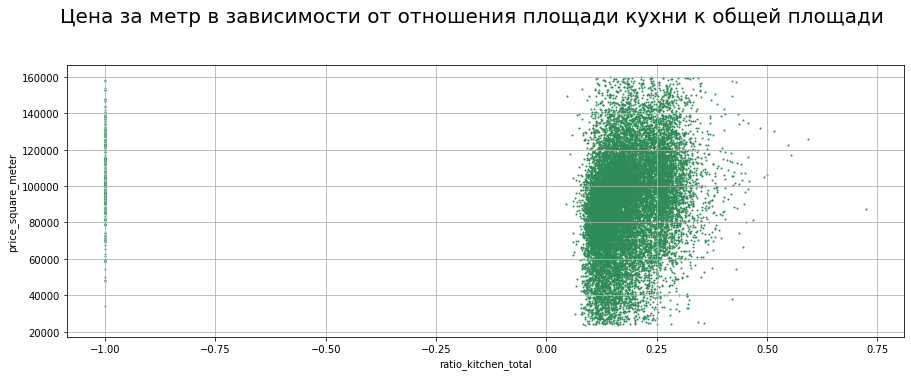

In [125]:
tipical_estate.plot(kind = 'scatter', x = 'ratio_kitchen_total', y = 'price_square_meter',
            figsize = (15, 5), color = '#2E8B57', s = 1, alpha = 1, grid = True)
plt.figtext(.5, 1, 'Цена за метр в зависимости от отношения площади кухни к общей площади', fontsize = 20, ha = 'center')
plt.show()

Цена квадратного метра не зависит от отношения площади кухни к общей площади.

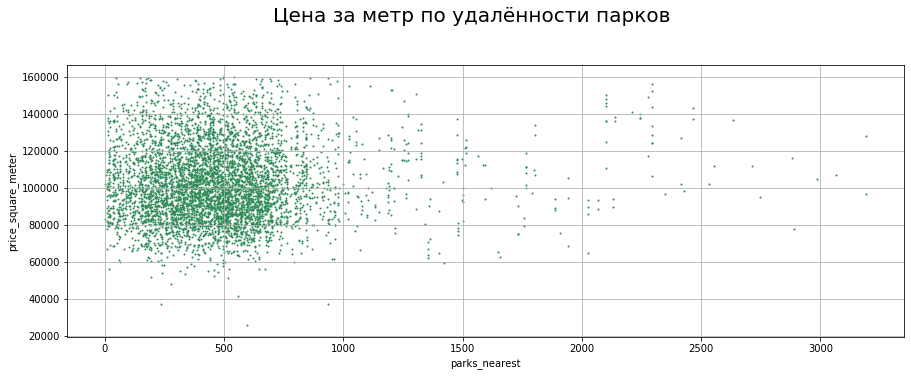

In [126]:
tipical_estate.query('parks_nearest > -1').plot(kind = 'scatter', x = 'parks_nearest', y = 'price_square_meter',
            figsize = (15, 5), color = '#2E8B57', s = 1, alpha = 1, grid = True)
plt.figtext(.5, 1, 'Цена за метр по удалённости парков', fontsize = 20, ha = 'center')
plt.show()

Чёткой зависимости цены квадратного метра от удалённости парков нет. В равной удалённости от парков есть и дорогие и дешёвые квартиры.

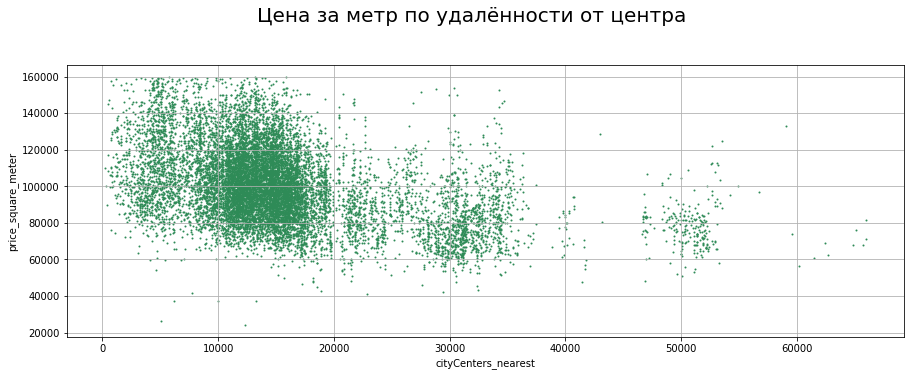

In [127]:
tipical_estate.query('cityCenters_nearest > -1').plot(kind = 'scatter', x = 'cityCenters_nearest', y = 'price_square_meter',
            figsize = (15, 5), color = '#2E8B57', s = 1, alpha = 1, grid = True)
plt.figtext(.5, 1, 'Цена за метр по удалённости от центра', fontsize = 20, ha = 'center')
plt.show()

Можно предполагать, что, чем дальше квартира от центра, тем меньше будет цена за квадратный метр, но чёткой зависимости снова нет.

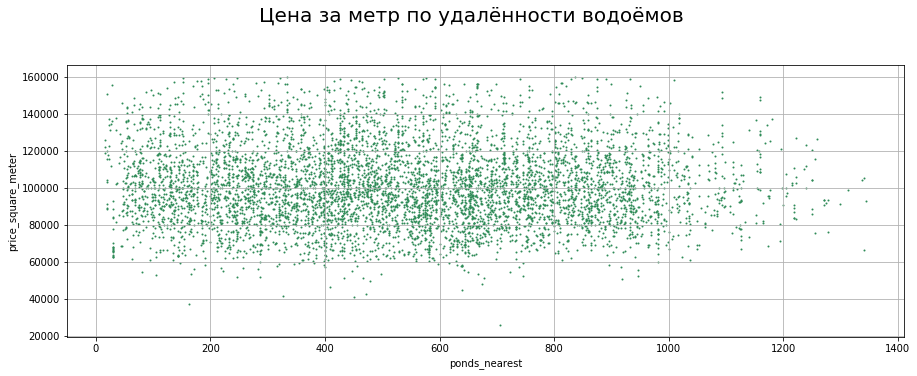

In [128]:
tipical_estate.query('ponds_nearest > -1').plot(kind = 'scatter', x = 'ponds_nearest', y = 'price_square_meter',
            figsize = (15, 5), color = '#2E8B57', s = 1, alpha = 1, grid = True)
plt.figtext(.5, 1, 'Цена за метр по удалённости водоёмов', fontsize = 20, ha = 'center')
plt.show()

Цена квадратного метра не зависит от удалённости от водоёмов.

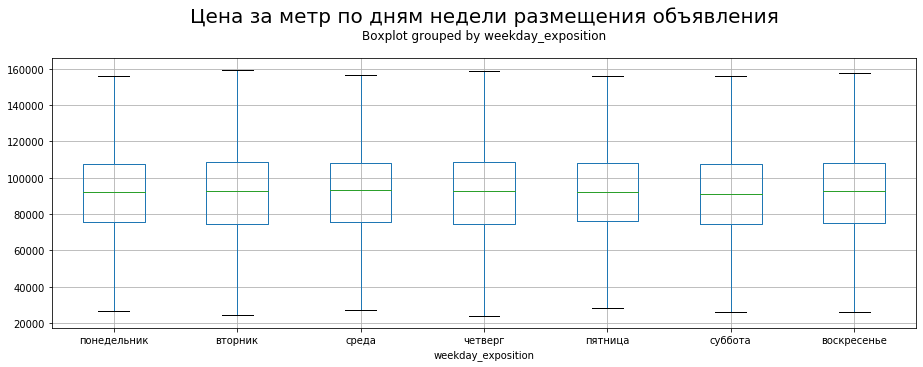

In [129]:
ax = tipical_estate.boxplot(column = 'price_square_meter',
                            by = 'weekday_exposition', grid = True,
                            figsize = (15, 5), sym = '')
plt.title('')
plt.figtext(.5, 1, 'Цена за метр по дням недели размещения объявления', fontsize = 20, ha = 'center')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[:] = ['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']
ax.set_xticklabels(labels)

plt.show()

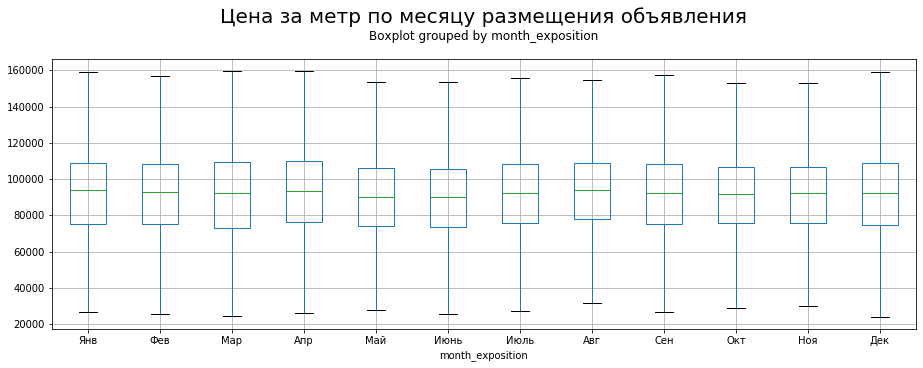

In [130]:
ax = tipical_estate.boxplot(column = 'price_square_meter',
                            by = 'month_exposition', grid = True,
                            figsize = (15, 5), sym = '')
plt.title('')
plt.figtext(.5, 1, 'Цена за метр по месяцу размещения объявления', fontsize = 20, ha = 'center')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[:] = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июнь', 'Июль', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']
ax.set_xticklabels(labels)

plt.show()

Цена за квадратный метр не зависит от дня недели и месяца размещения объявления.

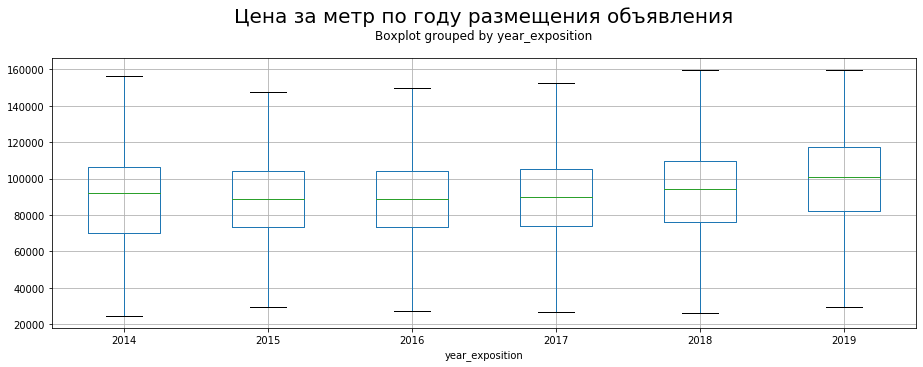

In [131]:
box_price(tipical_estate, 'price_square_meter',
          'year_exposition', 'Цена за метр по году размещения объявления')

Цена за квадратный метр немного выросла в 2019 году.

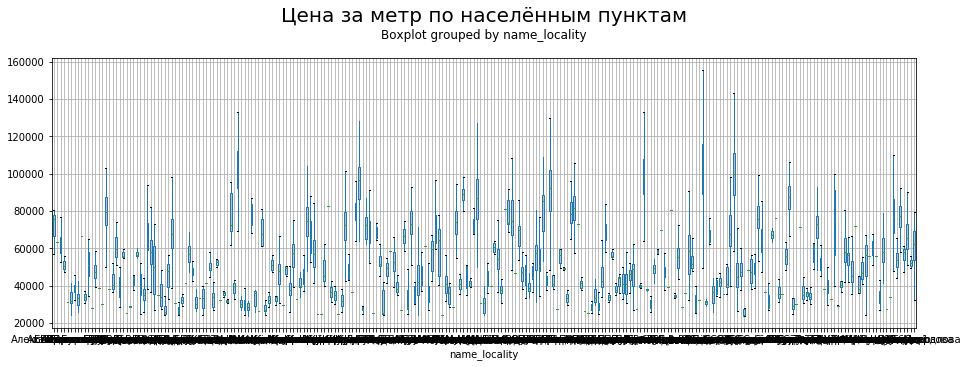

In [132]:
box_price(tipical_estate, 'price_square_meter',
          'name_locality', 'Цена за метр по населённым пунктам')

Симпотично, но неинформативно.

In [133]:
def location_type(column):
    if column == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    else:
        return 'пригород'
    
tipical_estate['type_location'] = tipical_estate['name_locality'].apply(location_type)

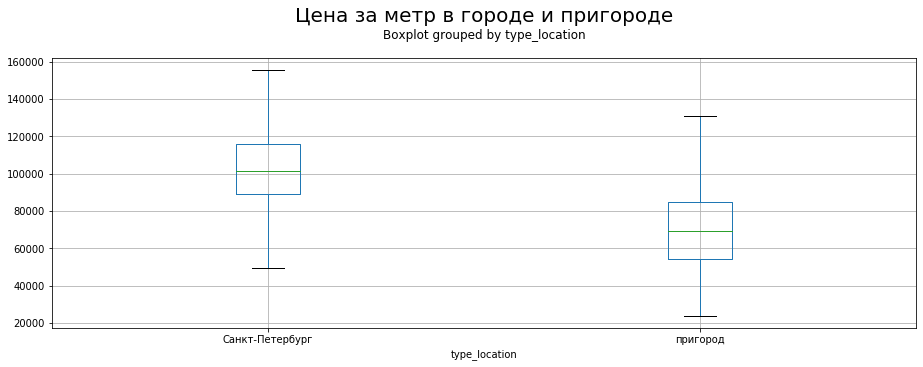

In [134]:
box_price(tipical_estate, 'price_square_meter',
          'type_location', 'Цена за метр в городе и пригороде')

Цена за метр в пригороде гораздо ниже, чем в Санкт-Петербурге.

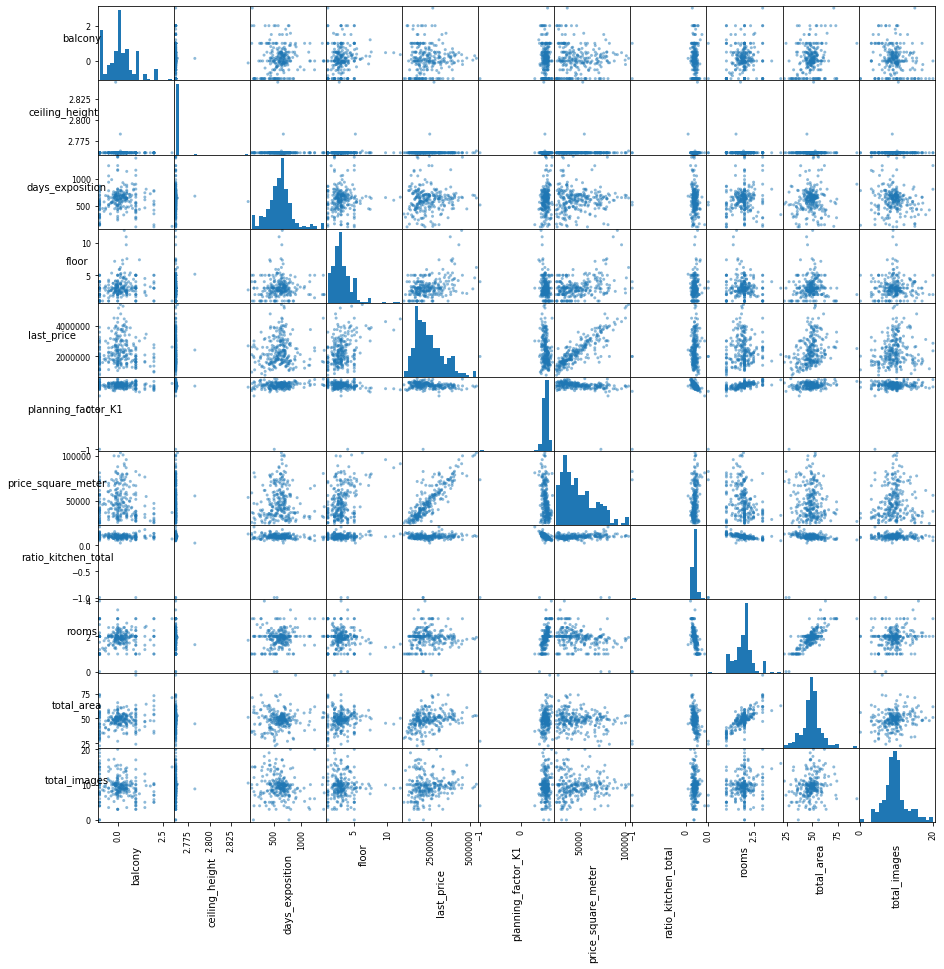

In [135]:
estate_price_metr = tipical_estate.pivot_table(index = 'name_locality', values = ['rooms', 'total_images',
                                                                                  'days_exposition',
                                                                                  'floor', 'total_area', 'balcony',
                                                                                  'planning_factor_K1',
                                                                                  'ratio_kitchen_total',
                                                                                  'ceiling_height',
                                                                                  'last_price', 'price_square_meter'],
                                           aggfunc = 'mean')

scat_mat = pd.plotting.scatter_matrix(estate_price_metr, figsize = (15, 15), hist_kwds = {'bins': 20})
for ax in scat_mat.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)
plt.show()

In [136]:
estate_price_metr.corr().style.background_gradient()

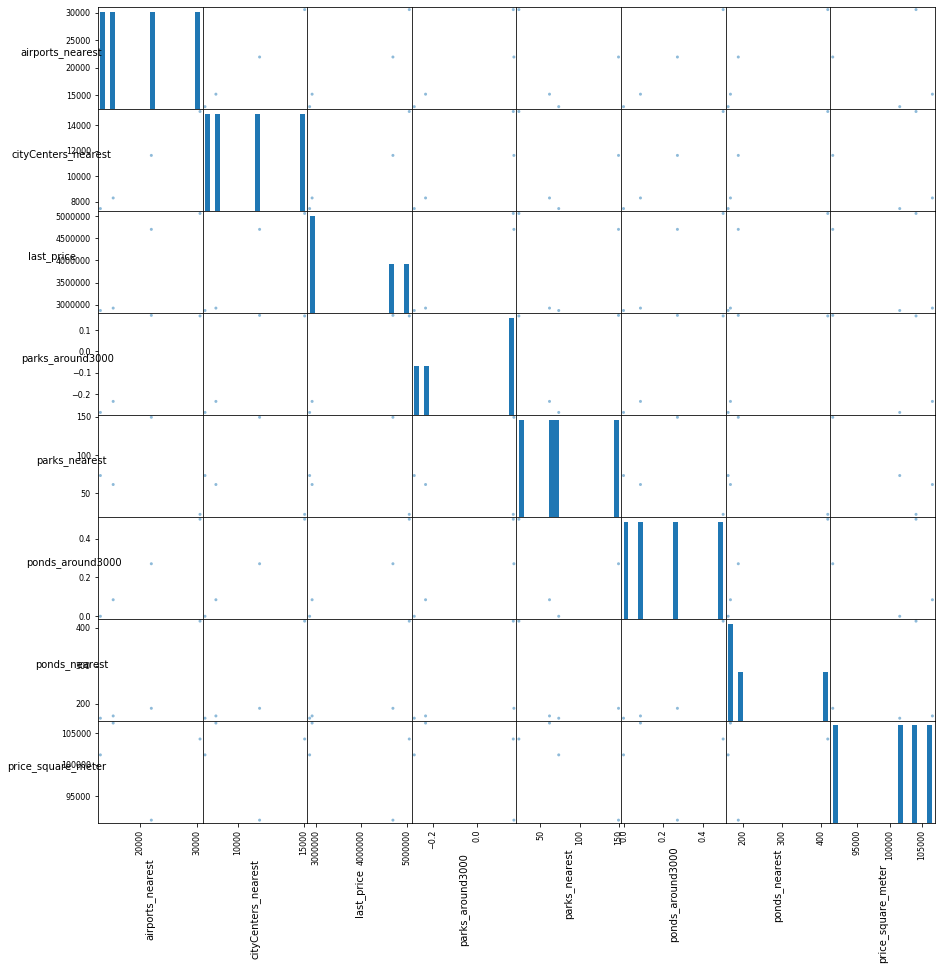

In [137]:
estate_price_metr_infr = tipical_estate.pivot_table(index = 'type_plan', values = ['airports_nearest',
                                                                                  'cityCenters_nearest',
                                                                                  'parks_around3000',
                                                                                  'parks_nearest',
                                                                                  'ponds_around3000',
                                                                                  'ponds_nearest',
                                                                                  'last_price', 'price_square_meter'],
                                               aggfunc = 'mean')

scat_mat = pd.plotting.scatter_matrix(estate_price_metr_infr, figsize = (15, 15), hist_kwds = {'bins': 20})
for ax in scat_mat.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)
plt.show()

In [138]:
estate_price_metr_infr.corr().style.background_gradient()

Цена за квадратный метр зависит от общей площади.

<a id="center"></a>
<div class="alert alert-block alert-info">
<h2>Квартиры в центре</h2>
</div>

В большинстве областных населённых пунктов не выделяют центральный район, поэтому будем рассматривать 3 группы: центр Санкт-Петербурга, вне центра Санкт-Петербурга, но в пределах города, и область.
<br>Максимальная ширина центрального района Санкт-Петербурга ~5800 м, соответственно максимальное расстояние до центра города 2900 м.

<img src = "../images/centerspb.png" style = "width: 500px;"/>

In [139]:
center_spb = tipical_estate.query('-1 < cityCenters_nearest <= 2900 and name_locality == "Санкт-Петербург"') # центральный район
notcenter_spb = tipical_estate.query('2900 < cityCenters_nearest and name_locality == "Санкт-Петербург"')
not_spb = tipical_estate.query('-1 < cityCenters_nearest and name_locality != "Санкт-Петербург"')
print ('Количество объявлений в центре Санкт-Петербурга:', center_spb.shape[0])
print ('Количество объявлений вне центра Санкт-Петербурга:', notcenter_spb.shape[0])
print ('Количество объявлений в Ленинградской области:', not_spb.shape[0])

Количество объявлений в центре Санкт-Петербурга: 221
Количество объявлений вне центра Санкт-Петербурга: 11135
Количество объявлений в Ленинградской области: 2124


Квартир в центральном районе Санкт-Петербурга мало.

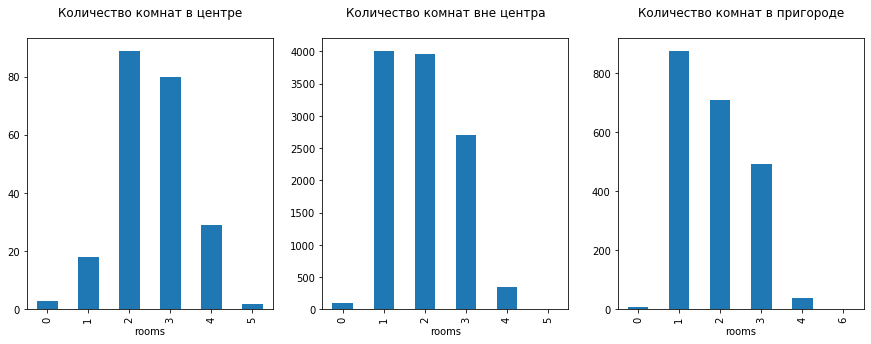

In [140]:
rooms_count1 = center_spb.groupby(['rooms']).size()
rooms_count2 = notcenter_spb.groupby(['rooms']).size()
rooms_count3 = not_spb.groupby(['rooms']).size()

gridsize = (1, 3)
fig = plt.figure(figsize = (15, 5))

ax1 = plt.subplot2grid(gridsize, (0, 0))
ax1 = rooms_count1.plot(y = 'rooms', kind = 'bar')

ax2 = plt.subplot2grid(gridsize, (0, 1))
ax2 = rooms_count2.plot(y = 'rooms', kind = 'bar')

ax3 = plt.subplot2grid(gridsize, (0, 2))
ax3 = rooms_count3.plot(y = 'rooms', kind = 'bar')

ax1.set_title('Количество комнат в центре\n')
ax2.set_title('Количество комнат вне центра\n')
ax3.set_title('Количество комнат в пригороде\n')

plt.show()

In [141]:
center_spb_cor = center_spb.pivot_table(index = 'type_plan', values = ['cityCenters_nearest',
                                                                       'price_square_meter',
                                                                       'total_area',
                                                                       'rooms',
                                                                       'last_price'],
                                               aggfunc = 'mean')

In [142]:
center_spb_cor.corr().style.background_gradient()

In [143]:
center_spb_cor = center_spb.pivot_table(index = 'type_plan', values = ['cityCenters_nearest',
                                                                       'price_square_meter',
                                                                       'total_area',
                                                                       'rooms',
                                                                       'last_price'],
                                               aggfunc = 'mean')

In [144]:
center_spb_cor.corr().style.background_gradient()

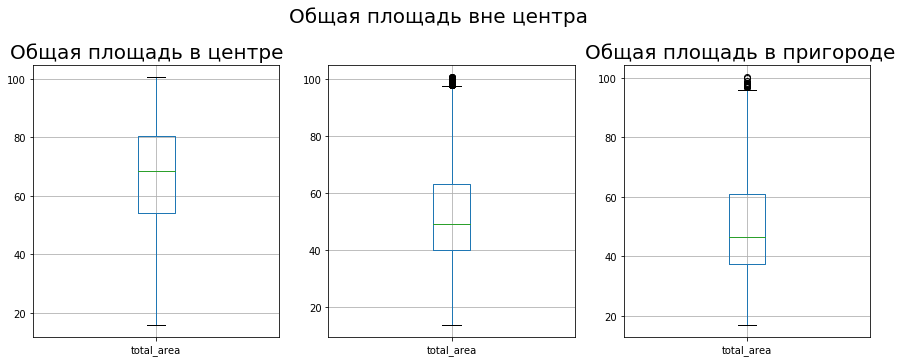

In [145]:
gridsize = (1, 3)
fig = plt.figure(figsize = (15, 5))

ax1 = plt.subplot2grid(gridsize, (0, 0))
ax1 = center_spb.boxplot(column = 'total_area', grid = True, figsize = (5, 5))
plt.title('')
plt.figtext(.23, .9, 'Общая площадь в центре', fontsize = 20, ha = 'center')

ax2 = plt.subplot2grid(gridsize, (0, 1))
ax2 = notcenter_spb.boxplot(column = 'total_area', grid = True, figsize = (5, 5))
plt.title('')
plt.figtext(.5, 1, 'Общая площадь вне центра', fontsize = 20, ha = 'center')

ax3 = plt.subplot2grid(gridsize, (0, 2))
ax3 = not_spb.boxplot(column = 'total_area', grid = True, figsize = (5, 5))
plt.title('')
plt.figtext(.78, .9, 'Общая площадь в пригороде', fontsize = 20, ha = 'center')

plt.show()

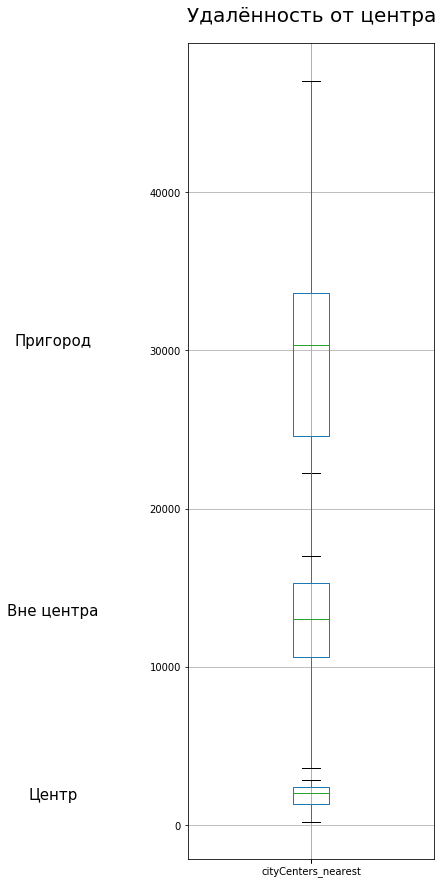

In [146]:
gridsize = (1, 3)
fig = plt.figure(figsize = (15, 15))

plt.figtext(.24, .9, 'Удалённость от центра', fontsize = 20, ha = 'center')

ax1 = plt.subplot2grid(gridsize, (0, 0))
ax1 = center_spb.boxplot(column = 'cityCenters_nearest', grid = True, figsize = (5, 5), sym = '')
plt.figtext(0, .18, 'Центр', fontsize = 15, ha = 'center')

#ax2 = plt.subplot2grid(gridsize, (0, 1))
ax2 = notcenter_spb.boxplot(column = 'cityCenters_nearest', grid = True, figsize = (5, 5), sym = '')
plt.figtext(0, .35, 'Вне центра', fontsize = 15, ha = 'center')

#ax3 = plt.subplot2grid(gridsize, (0, 2))
ax3 = not_spb.boxplot(column = 'cityCenters_nearest', grid = True, figsize = (5, 5), sym = '')
plt.figtext(0, .6, 'Пригород', fontsize = 15, ha = 'center')

plt.show()

In [147]:
center_spb_cor = center_spb.pivot_table(index = 'type_plan', values = ['cityCenters_nearest',
                                                                       'price_square_meter',
                                                                       'total_area',
                                                                       'rooms',
                                                                       'last_price'],
                                               aggfunc = 'mean')

In [148]:
center_spb_cor.corr().style.background_gradient()

In [149]:
notcenter_spb_cor = notcenter_spb.pivot_table(index = 'type_plan', values = ['cityCenters_nearest',
                                                                       'price_square_meter',
                                                                       'total_area',
                                                                       'rooms',
                                                                       'last_price'],
                                               aggfunc = 'mean')

In [150]:
notcenter_spb_cor.corr().style.background_gradient()

In [151]:
not_spb_cor = not_spb.pivot_table(index = 'type_plan', values = ['cityCenters_nearest',
                                                                       'price_square_meter',
                                                                       'total_area',
                                                                       'rooms',
                                                                       'last_price'],
                                               aggfunc = 'mean')

In [152]:
not_spb_cor.corr().style.background_gradient()

In [153]:
estate_cor = tipical_estate.pivot_table(index = 'type_plan', values = ['cityCenters_nearest',
                                                                       'price_square_meter',
                                                                       'total_area',
                                                                       'rooms',
                                                                       'last_price'],
                                               aggfunc = 'mean')

In [154]:
estate_cor.corr().style.background_gradient()

Цена всегда зависит от общей площади и, соответственно, количества комнат.
<br>Примечательно, что коэффициент корреляции цены и удалённости от центра на общей выборке схож с тем же коэффициентом для квартир в пригороде, хотя большая часть квартир общей выборки находится вне центра в Санкт-Петербурге.

Похоже, цена за метр сильно уменьшается с увеличением количества комнат или общей площади.

In [155]:
def graphics_data(data, column, nbins, title):
    gridsize = (1, 2)
    fig = plt.figure(figsize = (15, 5))

    ax1 = plt.subplot2grid(gridsize, (0, 0))
    ax1 = data.boxplot(column, sym = '')
    
    ax2 = plt.subplot2grid(gridsize, (0, 1))
    ax2 = data[column].hist(bins = nbins)

    ax1.set_title(title+'\n')
    ax2.set_title(title+'\n')

    plt.show()

In [156]:
def slic_data(data, column):
    first_quartile = column.describe()['25%']
    third_quartile = column.describe()['75%']
    return data.query('@first_quartile <= @column <= @third_quartile')

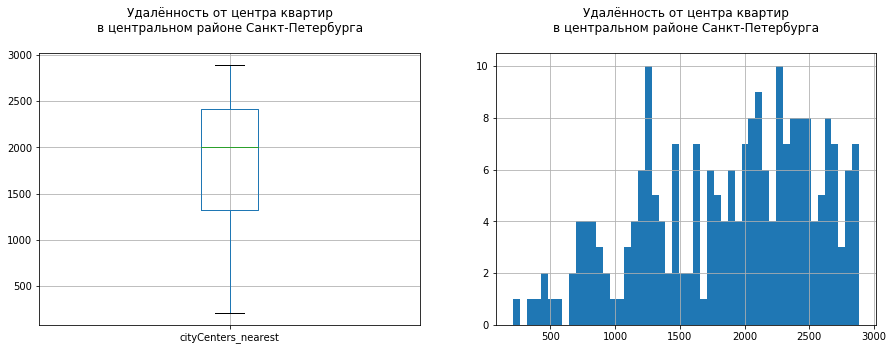

In [157]:
graphics_data(center_spb, 'cityCenters_nearest', 50,
              'Удалённость от центра квартир\nв центральном районе Санкт-Петербурга')

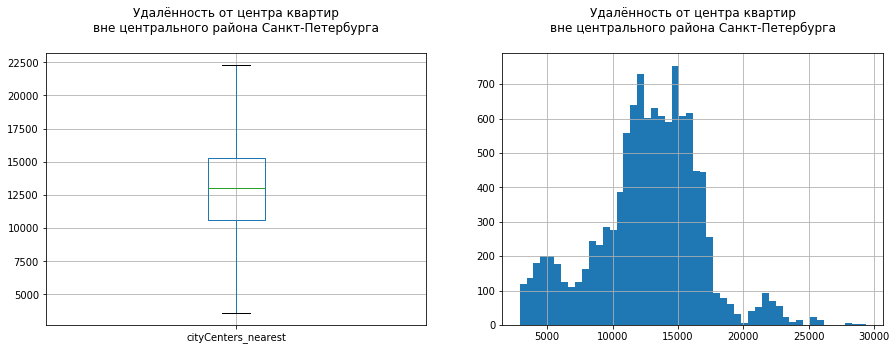

In [158]:
graphics_data(notcenter_spb, 'cityCenters_nearest', 50,
              'Удалённость от центра квартир\nвне центрального района Санкт-Петербурга')

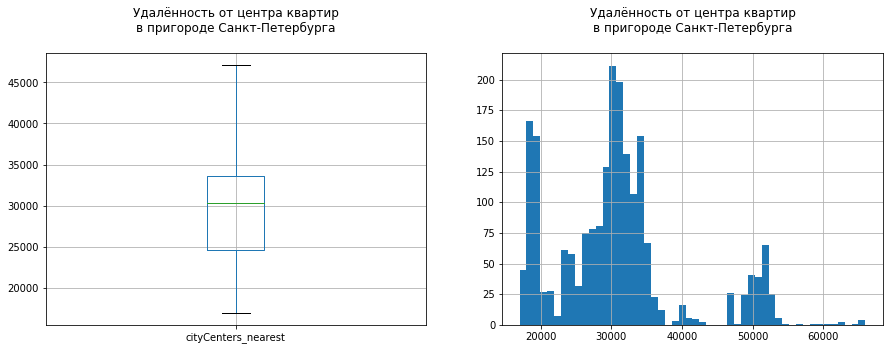

In [159]:
graphics_data(not_spb, 'cityCenters_nearest', 50,
              'Удалённость от центра квартир\nв пригороде Санкт-Петербурга')

In [160]:
print ('В центральном районе Санкт-Петербурга {:.2%}'
       .format(slic_data(center_spb, center_spb['cityCenters_nearest']).shape[0] / center_spb.shape[0]),
       'квартир расположены в {:.0f}'.format(center_spb['cityCenters_nearest'].describe()['25%']),
       '- {:.0f}'.format(center_spb['cityCenters_nearest'].describe()['75%']), 'метрах от центра.')

print ('Вне центрального района Санкт-Петербурга {:.2%}'
       .format(slic_data(notcenter_spb, notcenter_spb['cityCenters_nearest']).shape[0] / notcenter_spb.shape[0]),
       'квартир расположены в {:.0f}'.format(notcenter_spb['cityCenters_nearest'].describe()['25%']),
       '- {:.0f}'.format(notcenter_spb['cityCenters_nearest'].describe()['75%']), 'метрах от центра.')

print ('В пригороде Санкт-Петербурга {:.2%}'
       .format(slic_data(not_spb, not_spb['cityCenters_nearest']).shape[0] / not_spb.shape[0]),
       'квартир расположены в {:.0f}'.format(not_spb['cityCenters_nearest'].describe()['25%']),
       '- {:.0f}'.format(not_spb['cityCenters_nearest'].describe()['75%']), 'метрах от центра.')

В центральном районе Санкт-Петербурга 50.23% квартир расположены в 1325 - 2417 метрах от центра.
Вне центрального района Санкт-Петербурга 50.00% квартир расположены в 10622 - 15279 метрах от центра.
В пригороде Санкт-Петербурга 50.00% квартир расположены в 24576 - 33610 метрах от центра.


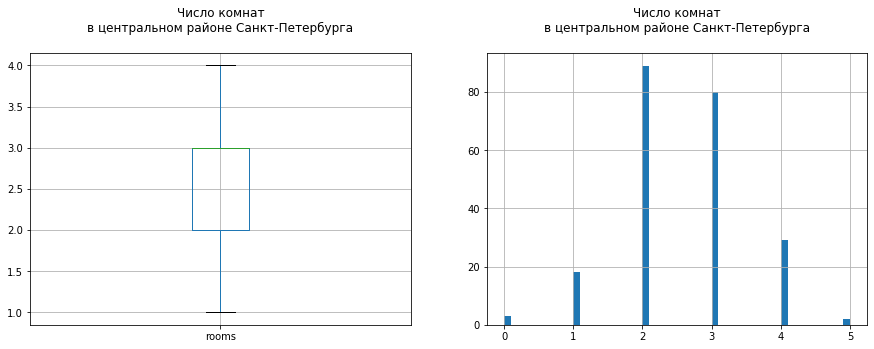

In [161]:
graphics_data(center_spb, 'rooms', 50,
              'Число комнат\nв центральном районе Санкт-Петербурга')

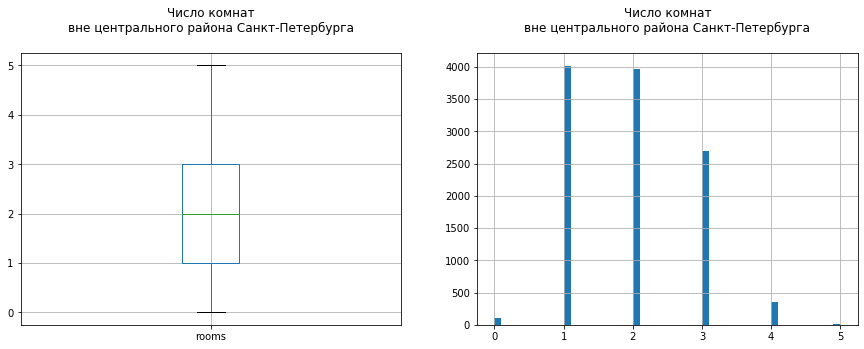

In [162]:
graphics_data(notcenter_spb, 'rooms', 50,
              'Число комнат\nвне центрального района Санкт-Петербурга')

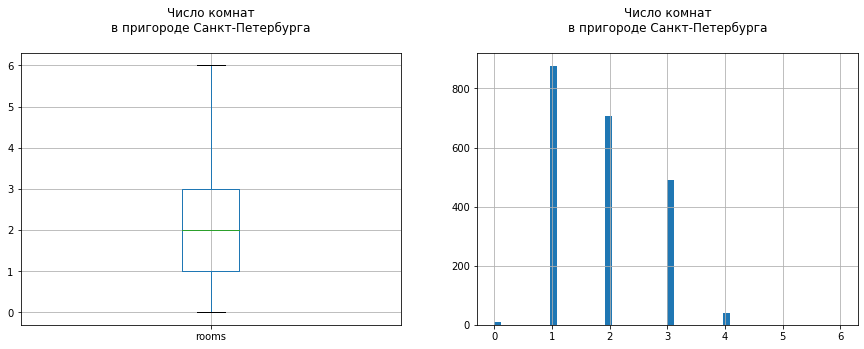

In [163]:
graphics_data(not_spb, 'rooms', 50,
              'Число комнат\nв пригороде Санкт-Петербурга')

In [164]:
print ('В центральном районе Санкт-Петербурга {:.2%}'
       .format(slic_data(center_spb, center_spb['rooms']).shape[0] / center_spb.shape[0]),
       'квартир имеют {:.0f}'.format(center_spb['rooms'].describe()['25%']),
       '- {:.0f}'.format(center_spb['rooms'].describe()['75%']), 'комнаты.')

print ('Вне центрального района Санкт-Петербурга {:.2%}'
       .format(slic_data(notcenter_spb, notcenter_spb['rooms']).shape[0] / notcenter_spb.shape[0]),
       'квартир имеют {:.0f}'.format(notcenter_spb['rooms'].describe()['25%']),
       '- {:.0f}'.format(notcenter_spb['rooms'].describe()['75%']), 'комнаты.')

print ('В пригороде Санкт-Петербурга {:.2%}'
       .format(slic_data(not_spb, not_spb['rooms']).shape[0] / not_spb.shape[0]),
       'квартир имеют {:.0f}'.format(not_spb['rooms'].describe()['25%']),
       '- {:.0f}'.format(not_spb['rooms'].describe()['75%']), 'комнаты.')

В центральном районе Санкт-Петербурга 76.47% квартир имеют 2 - 3 комнаты.
Вне центрального района Санкт-Петербурга 95.90% квартир имеют 1 - 3 комнаты.
В пригороде Санкт-Петербурга 97.69% квартир имеют 1 - 3 комнаты.


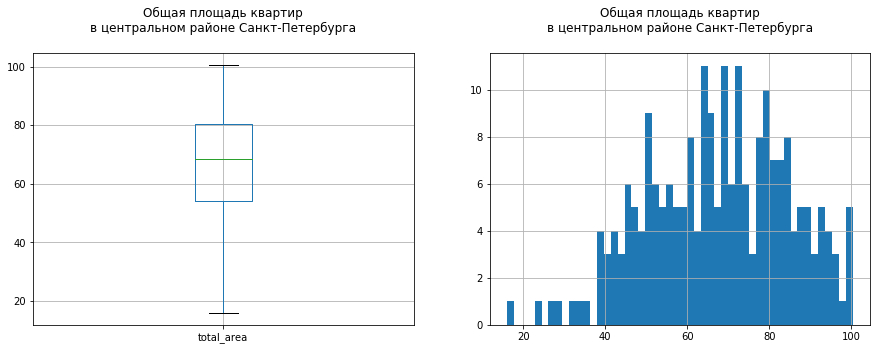

In [165]:
graphics_data(center_spb, 'total_area', 50,
              'Общая площадь квартир\nв центральном районе Санкт-Петербурга')

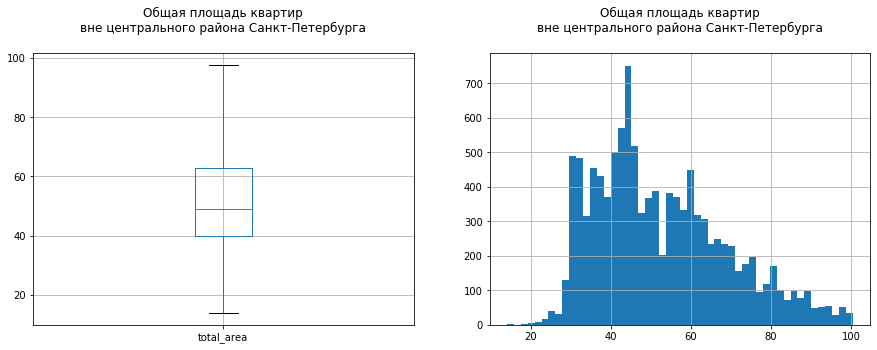

In [166]:
graphics_data(notcenter_spb, 'total_area', 50,
              'Общая площадь квартир\nвне центрального района Санкт-Петербурга')

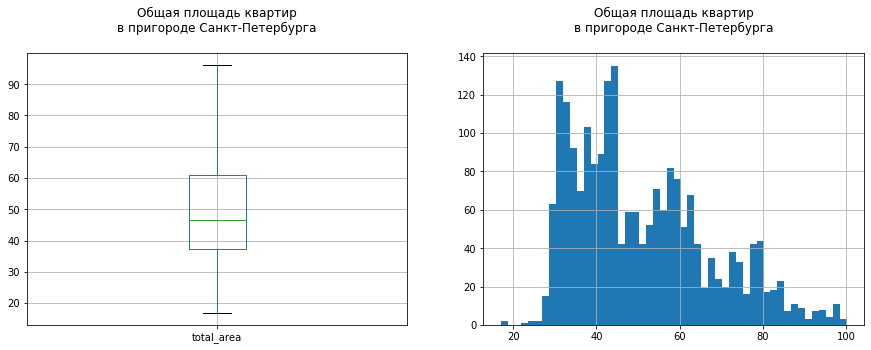

In [167]:
graphics_data(not_spb, 'total_area', 50,
              'Общая площадь квартир\nв пригороде Санкт-Петербурга')

In [168]:
print ('В центральном районе Санкт-Петербурга {:.2%}'
       .format(slic_data(center_spb, center_spb['total_area']).shape[0] / center_spb.shape[0]),
       'квартир имеют общую площадь {:.0f}'.format(center_spb['total_area'].describe()['25%']),
       '- {:.0f}'.format(center_spb['total_area'].describe()['75%']), 'кв.м.')

print ('Вне центрального района Санкт-Петербурга {:.2%}'
       .format(slic_data(notcenter_spb, notcenter_spb['total_area']).shape[0] / notcenter_spb.shape[0]),
       'квартир имеют общую площадь {:.0f}'.format(notcenter_spb['total_area'].describe()['25%']),
       '- {:.0f}'.format(notcenter_spb['total_area'].describe()['75%']), 'кв.м.')

print ('В пригороде Санкт-Петербурга {:.2%}'
       .format(slic_data(not_spb, not_spb['total_area']).shape[0] / not_spb.shape[0]),
       'квартир имеют общую площадь {:.0f}'.format(not_spb['total_area'].describe()['25%']),
       '- {:.0f}'.format(not_spb['total_area'].describe()['75%']), 'кв.м.')

В центральном районе Санкт-Петербурга 51.58% квартир имеют общую площадь 54 - 80 кв.м.
Вне центрального района Санкт-Петербурга 50.57% квартир имеют общую площадь 40 - 63 кв.м.
В пригороде Санкт-Петербурга 50.89% квартир имеют общую площадь 37 - 61 кв.м.


In [169]:
tipical_center_spb = slic_data(center_spb, center_spb['total_area'])
tipical_center_spb = slic_data(tipical_center_spb, tipical_center_spb['rooms'])
tipical_center_spb = slic_data(tipical_center_spb, tipical_center_spb['cityCenters_nearest'])

tipical_notcenter_spb = slic_data(notcenter_spb, notcenter_spb['total_area'])
tipical_notcenter_spb = slic_data(tipical_notcenter_spb, tipical_notcenter_spb['rooms'])
tipical_notcenter_spb = slic_data(tipical_notcenter_spb, tipical_notcenter_spb['cityCenters_nearest'])

tipical_not_spb = slic_data(not_spb, not_spb['total_area'])
tipical_not_spb = slic_data(tipical_not_spb, tipical_not_spb['rooms'])
tipical_not_spb = slic_data(tipical_not_spb, tipical_not_spb['cityCenters_nearest'])

In [170]:
print ('В центральном районе Санкт-Петербурга {:.2%}'
       .format(tipical_center_spb.shape[0] / center_spb.shape[0]),
       'квартир имеют общую площадь {:.0f}'.format(center_spb['total_area'].describe()['25%']),
       '- {:.0f}'.format(center_spb['total_area'].describe()['75%']), 'кв.м.,',
       '{:.0f}'.format(center_spb['rooms'].describe()['25%']),
       '- {:.0f}'.format(center_spb['rooms'].describe()['75%']), 'комнаты и находятся на расстоянии',
       '{:.0f}'.format(center_spb['cityCenters_nearest'].describe()['25%']),
       '- {:.0f}'.format(center_spb['cityCenters_nearest'].describe()['75%']), 'метров от центра.\n')

print ('Вне центрального района Санкт-Петербурга {:.2%}'
       .format(tipical_notcenter_spb.shape[0] / notcenter_spb.shape[0]),
       'квартир имеют общую площадь {:.0f}'.format(notcenter_spb['total_area'].describe()['25%']),
       '- {:.0f}'.format(notcenter_spb['total_area'].describe()['75%']), 'кв.м.,',
       '{:.0f}'.format(notcenter_spb['rooms'].describe()['25%']),
       '- {:.0f}'.format(notcenter_spb['rooms'].describe()['75%']), 'комнаты и находятся на расстоянии',
       '{:.0f}'.format(notcenter_spb['cityCenters_nearest'].describe()['25%']),
       '- {:.0f}'.format(notcenter_spb['cityCenters_nearest'].describe()['75%']), 'метров от центра.\n')

print ('В пригороде Санкт-Петербурга {:.2%}'
       .format(tipical_not_spb.shape[0] / not_spb.shape[0]),
       'квартир имеют общую площадь {:.0f}'.format(not_spb['total_area'].describe()['25%']),
       '- {:.0f}'.format(not_spb['total_area'].describe()['75%']), 'кв.м.,',
       '{:.0f}'.format(not_spb['rooms'].describe()['25%']),
       '- {:.0f}'.format(not_spb['rooms'].describe()['75%']), 'комнаты и находятся на расстоянии',
       '{:.0f}'.format(not_spb['cityCenters_nearest'].describe()['25%']),
       '- {:.0f}'.format(not_spb['cityCenters_nearest'].describe()['75%']), 'метров от центра.')

В центральном районе Санкт-Петербурга 23.53% квартир имеют общую площадь 54 - 80 кв.м., 2 - 3 комнаты и находятся на расстоянии 1325 - 2417 метров от центра.

Вне центрального района Санкт-Петербурга 14.22% квартир имеют общую площадь 40 - 63 кв.м., 1 - 3 комнаты и находятся на расстоянии 10622 - 15279 метров от центра.

В пригороде Санкт-Петербурга 21.99% квартир имеют общую площадь 37 - 61 кв.м., 1 - 3 комнаты и находятся на расстоянии 24576 - 33610 метров от центра.


<a id="apart"></a>
<div class="alert alert-block alert-info">
<h2>Отличительные особенности апартаментов, студий и квартир свободной планировки</h2>
</div>

In [171]:
apart = tipical_estate.query('is_apartment_copy == True')
studio = tipical_estate.query('studio == True')
open_plan = tipical_estate.query('open_plan == True')
tipical_plan = tipical_estate.query('is_apartment == 0 and studio == False and open_plan == False')

In [172]:
print (apart.shape[0])
apart.describe()

18


total_images    last_price  total_area      rooms  ceiling_height  \
count     18.000000  1.800000e+01   18.000000  18.000000    1.800000e+01   
mean      10.777778  5.058473e+06   48.982778   1.444444    4.268409e+00   
std        5.341905  1.652173e+06   12.522157   0.704792    9.139281e-16   
min        0.000000  2.290000e+06   30.500000   1.000000    4.268409e+00   
25%        7.250000  4.150000e+06   42.925000   1.000000    4.268409e+00   
50%       10.000000  4.839500e+06   49.500000   1.000000    4.268409e+00   
75%       15.250000  5.587284e+06   53.025000   2.000000    4.268409e+00   
max       20.000000  9.897258e+06   85.200000   3.000000    4.268409e+00   

       floors_total  living_area      floor  is_apartment  kitchen_area  \
count     18.000000    18.000000  18.000000          18.0     18.000000   
mean       9.222222    25.065556   5.277778           1.0     10.625556   
std        7.503376     9.749579   5.399407           0.0      2.952770   
min        4.000000    13.920000   1.000000           1.0      5.000000   
25%        4.000000    17.625000   2.000000           1.0      9.625000   
50%        5.000000    20.760000   3.000000           1.0     10.645000   
75%       12.500000    30.500000   6.000000           1.0     11.925000   
max       27.000000    48.480000  22.000000           1.0     15.900000   

         balcony  airports_nearest  cityCenters_nearest  parks_around3000  \
count  18.000000         18.000000            18.000000         18.000000   
mean    1.555556      30554.555556         15077.333333          0.166667   
std     1.652884      16704.128916          7593.919487          0.923548   
min    -1.000000         -1.000000            -1.000000         -1.000000   
25%     1.000000      19796.500000         11545.750000          0.000000   
50%     2.000000      36423.000000         18393.500000          0.000000   
75%     2.000000      44870.000000         20802.000000          0.000000   
max     5.000000      45767.000000         22710.000000          3.000000   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
count      18.000000         18.000000      18.000000        18.000000   
mean       22.500000          0.500000     417.333333       586.166667   
std        93.647807          0.707107     368.013587       344.011670   
min        -1.000000         -1.000000      -1.000000       118.000000   
25%        -1.000000          0.000000      -1.000000       389.000000   
50%        -1.000000          1.000000     560.000000       472.500000   
75%        -1.000000          1.000000     791.250000       783.250000   
max       397.000000          1.000000     826.000000      1227.000000   

       price_square_meter  weekday_exposition  month_exposition  \
count           18.000000           18.000000         18.000000   
mean        104070.071099            1.944444          6.111111   
std          21606.362140            1.893401          2.826115   
min          53255.813953            0.000000          2.000000   
25%          93654.415636            0.000000          4.000000   
50%         110820.303665            2.000000          6.000000   
75%         117908.006329            3.000000          7.000000   
max         132575.757576            6.000000         12.000000   

       year_exposition  planning_factor_K1  ratio_kitchen_total  
count        18.000000           18.000000            18.000000  
mean       2017.555556            0.507959             0.224385  
std           0.855585            0.123726             0.065741  
min        2016.000000            0.333333             0.116279  
25%        2017.000000            0.429656             0.180025  
50%        2018.000000            0.490154             0.231571  
75%        2018.000000            0.564172             0.276231  
max        2019.000000            0.734127             0.320205

In [173]:
print (studio.shape[0])
studio.describe()

141


total_images    last_price  total_area       rooms  ceiling_height  \
count    141.000000  1.410000e+02  141.000000  141.000000    1.410000e+02   
mean       7.716312  2.923338e+06   27.344610    0.078014    2.760720e+00   
std        4.861402  1.093398e+06    7.433211    0.269150    3.119707e-15   
min        0.000000  9.457500e+05   15.500000    0.000000    2.760720e+00   
25%        4.000000  2.290000e+06   24.000000    0.000000    2.760720e+00   
50%        7.000000  2.700000e+06   26.050000    0.000000    2.760720e+00   
75%       11.000000  3.400000e+06   28.900000    0.000000    2.760720e+00   
max       20.000000  8.200000e+06   73.600000    1.000000    2.760720e+00   

       floors_total  living_area       floor  is_apartment  kitchen_area  \
count    141.000000   141.000000  141.000000    141.000000         141.0   
mean      16.666667    17.745106    8.070922     -0.893617          -1.0   
std        6.837571     7.695281    5.772652      0.309426           0.0   
min        3.000000    -1.000000    1.000000     -1.000000          -1.0   
25%       12.000000    15.900000    3.000000     -1.000000          -1.0   
50%       17.000000    18.000000    7.000000     -1.000000          -1.0   
75%       23.000000    19.600000   12.000000     -1.000000          -1.0   
max       35.000000    68.000000   24.000000      0.000000          -1.0   

          balcony  airports_nearest  cityCenters_nearest  parks_around3000  \
count  141.000000        141.000000           141.000000        141.000000   
mean     0.574468      15211.624113          8306.893617         -0.234043   
std      1.353483      15763.789894          7724.757265          0.742951   
min     -1.000000         -1.000000            -1.000000         -1.000000   
25%     -1.000000         -1.000000            -1.000000         -1.000000   
50%      1.000000      12430.000000          9092.000000          0.000000   
75%      2.000000      23609.000000         14593.000000          0.000000   
max      2.000000      55551.000000         29846.000000          2.000000   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
count     141.000000        141.000000     141.000000       141.000000   
mean       61.560284          0.085106     168.113475       595.510638   
std       193.552148          1.105114     283.737910       321.495337   
min        -1.000000         -1.000000      -1.000000       112.000000   
25%        -1.000000         -1.000000      -1.000000       365.000000   
50%        -1.000000          0.000000      -1.000000       578.000000   
75%        -1.000000          1.000000     351.000000       756.000000   
max      1199.000000          3.000000    1159.000000      1647.000000   

       price_square_meter  weekday_exposition  month_exposition  \
count          141.000000          141.000000        141.000000   
mean        106595.693156            2.546099          6.354610   
std          24371.521398            1.683853          3.262634   
min          34375.000000            0.000000          1.000000   
25%          90740.740741            1.000000          4.000000   
50%         104761.904762            3.000000          7.000000   
75%         125000.000000            4.000000          9.000000   
max         158064.516129            6.000000         12.000000   

       year_exposition  planning_factor_K1  ratio_kitchen_total  
count       141.000000          141.000000                141.0  
mean       2017.510638            0.598661                 -1.0  
std           0.922861            0.383372                  0.0  
min        2015.000000           -1.000000                 -1.0  
25%        2017.000000            0.600000                 -1.0  
50%        2018.000000            0.686237                 -1.0  
75%        2018.000000            0.726141                 -1.0  
max        2019.000000            0.957746                 -1.0

In [174]:
print (open_plan.shape[0])
open_plan.describe()

63


total_images    last_price  total_area      rooms  ceiling_height  \
count     63.000000  6.300000e+01   63.000000  63.000000    6.300000e+01   
mean       7.507937  2.868905e+06   28.902063   0.174603    2.760720e+00   
std        5.532523  8.169254e+05    8.277713   0.610121    1.790625e-15   
min        0.000000  1.315000e+06   16.000000   0.000000    2.760720e+00   
25%        3.000000  2.330000e+06   25.000000   0.000000    2.760720e+00   
50%        7.000000  2.700000e+06   27.000000   0.000000    2.760720e+00   
75%       10.500000  3.362500e+06   29.000000   0.000000    2.760720e+00   
max       21.000000  6.000000e+06   64.500000   3.000000    2.760720e+00   

       floors_total  living_area      floor  is_apartment  kitchen_area  \
count     63.000000    63.000000  63.000000     63.000000          63.0   
mean      17.492063    18.642857   9.492063     -0.904762          -1.0   
std        6.862411     7.229302   7.052506      0.295901           0.0   
min        4.000000    -1.000000   1.000000     -1.000000          -1.0   
25%       12.000000    16.950000   3.500000     -1.000000          -1.0   
50%       18.000000    18.000000   8.000000     -1.000000          -1.0   
75%       24.000000    20.000000  13.500000     -1.000000          -1.0   
max       35.000000    48.000000  26.000000      0.000000          -1.0   

         balcony  airports_nearest  cityCenters_nearest  parks_around3000  \
count  63.000000         63.000000            63.000000         63.000000   
mean    1.079365      12949.492063          7475.476190         -0.285714   
std     1.140198      15674.299078          8380.809346          0.850589   
min    -1.000000         -1.000000            -1.000000         -1.000000   
25%     0.500000         -1.000000            -1.000000         -1.000000   
50%     2.000000      10663.000000          2621.000000          0.000000   
75%     2.000000      20558.000000         13472.500000          0.000000   
max     2.000000      53791.000000         33606.000000          2.000000   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
count      63.000000         63.000000      63.000000        63.000000   
mean       73.317460          0.000000     162.174603       734.269841   
std       220.139166          1.163975     281.198560       226.623050   
min        -1.000000         -1.000000      -1.000000       497.000000   
25%        -1.000000         -1.000000      -1.000000       632.000000   
50%        -1.000000          0.000000      -1.000000       651.000000   
75%        -1.000000          1.000000     207.000000       688.500000   
max      1021.000000          3.000000     893.000000      1667.000000   

       price_square_meter  weekday_exposition  month_exposition  \
count           63.000000           63.000000         63.000000   
mean        101556.543293            2.952381          8.222222   
std          23323.672093            1.650304          3.678378   
min          48133.235725            0.000000          1.000000   
25%          87662.888254            2.000000          4.500000   
50%         100000.000000            3.000000         10.000000   
75%         118369.608231            4.000000         11.000000   
max         152892.561983            6.000000         12.000000   

       year_exposition  planning_factor_K1  ratio_kitchen_total  
count        63.000000           63.000000                 63.0  
mean       2016.968254            0.605031                 -1.0  
std           0.621347            0.380892                  0.0  
min        2015.000000           -1.000000                 -1.0  
25%        2017.000000            0.628289                 -1.0  
50%        2017.000000            0.680000                 -1.0  
75%        2017.000000            0.730330                 -1.0  
max        2018.000000            1.000000                 -1.0

In [175]:
print (tipical_plan.shape[0])
tipical_plan.describe()

2096


total_images    last_price   total_area        rooms  ceiling_height  \
count   2096.000000  2.096000e+03  2096.000000  2096.000000    2.096000e+03   
mean       9.385973  4.765530e+06    53.055386     1.928435    2.760720e+00   
std        5.414061  1.961649e+06    16.455037     0.849895    5.907796e-14   
min        0.000000  7.500000e+05    17.000000     1.000000    2.760720e+00   
25%        5.000000  3.445250e+06    40.000000     1.000000    2.760720e+00   
50%        9.000000  4.400000e+06    50.000000     2.000000    2.760720e+00   
75%       13.000000  5.800000e+06    64.000000     3.000000    2.760720e+00   
max       21.000000  1.160000e+07   100.000000     5.000000    2.760720e+00   

       floors_total  living_area        floor  is_apartment  kitchen_area  \
count   2096.000000  2096.000000  2096.000000        2096.0   2096.000000   
mean      10.926527    30.468101     6.048187           0.0      9.294833   
std        6.527514    12.089761     4.974884           0.0      2.721268   
min        1.000000    10.000000     1.000000           0.0      2.890000   
25%        5.000000    18.500000     2.000000           0.0      7.000000   
50%        9.000000    30.000000     5.000000           0.0      9.000000   
75%       16.000000    39.025000     8.000000           0.0     11.000000   
max       35.000000    68.000000    27.000000           0.0     17.000000   

           balcony  airports_nearest  cityCenters_nearest  parks_around3000  \
count  2096.000000       2096.000000          2096.000000       2096.000000   
mean      0.916508      22003.555821         11782.297233          0.173664   
std       1.212975      16733.357929          9992.042411          0.924032   
min      -1.000000         -1.000000            -1.000000         -1.000000   
25%       0.000000       9999.500000          3436.750000          0.000000   
50%       1.000000      20313.500000         12037.000000          0.000000   
75%       2.000000      35162.500000         15655.000000          1.000000   
max       5.000000      84665.000000         65764.000000          3.000000   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
count    2096.000000       2096.000000    2096.000000      2096.000000   
mean      149.623569          0.296756     189.440363       913.438454   
std       285.724129          1.056725     302.477082       399.145863   
min        -1.000000         -1.000000      -1.000000       105.000000   
25%        -1.000000          0.000000      -1.000000       667.750000   
50%        -1.000000          0.000000      -1.000000       917.000000   
75%       237.500000          1.000000     364.250000      1218.250000   
max      2532.000000          3.000000    1275.000000      1723.000000   

       price_square_meter  weekday_exposition  month_exposition  \
count         2096.000000         2096.000000       2096.000000   
mean         90513.819393            2.548664          5.263359   
std          25423.267268            1.864252          3.040116   
min          24285.714286            0.000000          1.000000   
25%          73800.946892            1.000000          3.000000   
50%          90547.642823            2.000000          5.000000   
75%         107098.729113            4.000000          7.000000   
max         158500.000000            6.000000         12.000000   

       year_exposition  planning_factor_K1  ratio_kitchen_total  
count      2096.000000         2096.000000          2096.000000  
mean       2016.726622            0.564262             0.185428  
std           1.116668            0.097942             0.060498  
min        2014.000000            0.184272             0.043524  
25%        2016.000000            0.494097             0.137500  
50%        2017.000000            0.564706             0.173344  
75%        2017.000000            0.631364             0.228571  
max        2019.000000            0.954545             0.425000

Апартаментов, студий и квартир свободной планировки слишком мало для определения их характерных параметров.
<br>

In [176]:
apart_cor = apart.pivot_table(index = 'days_exposition', values = ['total_area', 'rooms', 'balcony',
                                                                   'airports_nearest', 'cityCenters_nearest',
                                                                   'name_locality', 'last_price'], aggfunc = 'mean')

apart_cor.corr().style.background_gradient()

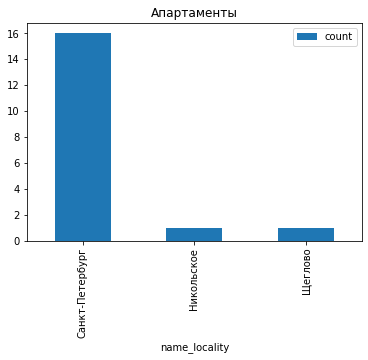

name_locality  count
1  Санкт-Петербург     16
0       Никольское      1
2          Щеглово      1

In [177]:
apart_loc = apart.groupby('name_locality').size()
apart_loc = pd.DataFrame({'name_locality':apart_loc.index, 'count':apart_loc.values})
apart_loc = apart_loc.sort_values('count', ascending = False)
apart_loc.plot(x = 'name_locality', y = 'count', kind = 'bar', title = 'Апартаменты')
plt.show()
apart_loc

In [178]:
studio_cor = studio.pivot_table(index = 'days_exposition', values = ['total_area', 'rooms', 'balcony',
                                                                   'airports_nearest', 'cityCenters_nearest',
                                                                   'name_locality', 'last_price'], aggfunc = 'mean')

studio_cor.corr().style.background_gradient()

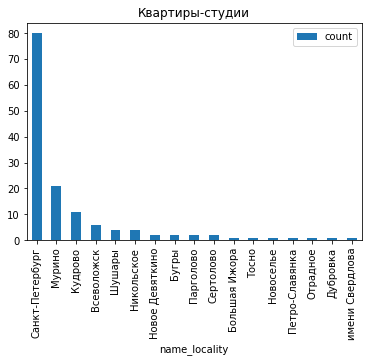

name_locality  count
12  Санкт-Петербург     80
5            Мурино     21
4           Кудрово     11
2        Всеволожск      6
15           Шушары      4
6        Никольское      4
7   Новое Девяткино      2
1             Бугры      2
10        Парголово      2
13        Сертолово      2

In [179]:
studio_loc = studio.groupby('name_locality').size()
studio_loc = pd.DataFrame({'name_locality':studio_loc.index, 'count':studio_loc.values})
studio_loc = studio_loc.sort_values('count', ascending = False)
studio_loc.plot(x = 'name_locality', y = 'count', kind = 'bar', title = 'Квартиры-студии')
plt.show()
studio_loc.head(10)

In [180]:
open_plan_cor = open_plan.pivot_table(index = 'days_exposition', values = ['total_area', 'rooms', 'balcony',
                                                                   'airports_nearest', 'cityCenters_nearest',
                                                                   'name_locality', 'last_price'], aggfunc = 'mean')

open_plan_cor.corr().style.background_gradient()

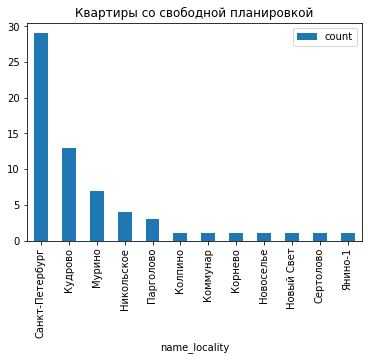

name_locality  count
9  Санкт-Петербург     29
3          Кудрово     13
4           Мурино      7
5       Никольское      4
8        Парголово      3
0          Колпино      1
1         Коммунар      1
2          Корнево      1
6        Новоселье      1
7       Новый Свет      1

In [181]:
open_plan_loc = open_plan.groupby('name_locality').size()
open_plan_loc = pd.DataFrame({'name_locality':open_plan_loc.index, 'count':open_plan_loc.values})
open_plan_loc = open_plan_loc.sort_values('count', ascending = False)
open_plan_loc.plot(x = 'name_locality', y = 'count', kind = 'bar', title = 'Квартиры со свободной планировкой')
plt.show()
open_plan_loc.head(10)

In [182]:
tipical_plan_cor = tipical_plan.pivot_table(index = 'days_exposition', values = ['total_area', 'rooms', 'balcony',
                                                                   'airports_nearest', 'cityCenters_nearest',
                                                                   'name_locality', 'last_price'], aggfunc = 'mean')

tipical_plan_cor.corr().style.background_gradient()

По-прежнему больше всего на цену влияет общая площадь.

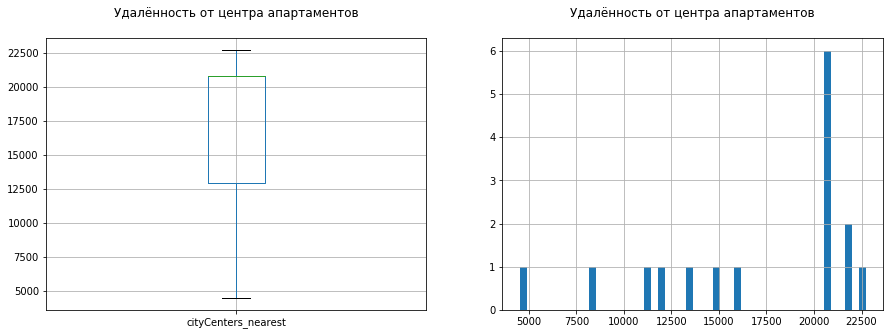

In [183]:
graphics_data(apart.query('cityCenters_nearest > -1'), 'cityCenters_nearest', 50, 'Удалённость от центра апартаментов')

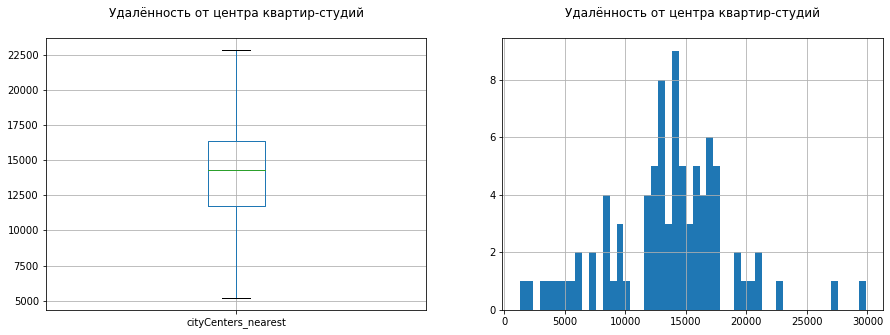

In [184]:
graphics_data(studio.query('cityCenters_nearest > -1'), 'cityCenters_nearest', 50, 'Удалённость от центра квартир-студий')

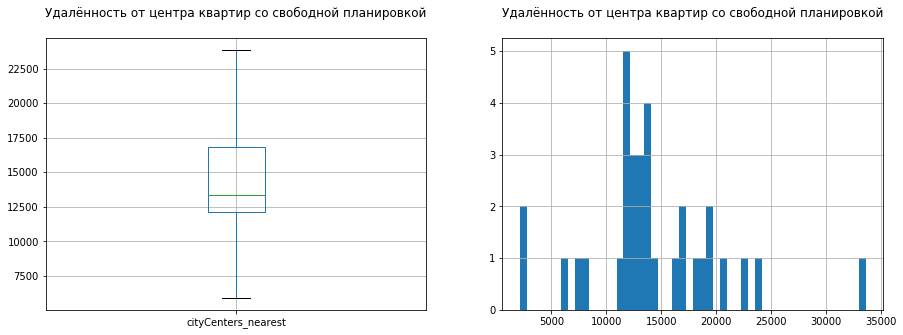

In [185]:
graphics_data(open_plan.query('cityCenters_nearest > -1'), 'cityCenters_nearest', 50, 'Удалённость от центра квартир со свободной планировкой')

<a id="summary"></a>
# **Выводы**

В изначальных данных наблюдался ряд проблем, которые могли повлиять на качество исследования.

**Достаточно высокая доля пропусков**

название столбца|значение|доля пропусков
-|-|-
*ceiling_height*|высота потолков (м)|38.80%
*floors_total*|всего этажей в доме|0.36%
*living_area*|жилая площадь (м²)|8.03%
*is_apartment*|апартаменты (булев тип)|88.29%
*kitchen_area*|площадь кухни (м²)|9.61%
*balcony*|число балконов|48.61%
*locality_name*|название населённого пункта|0.21%
*airports_nearest*|расстояние до ближайшего аэропорта в метрах (м)|23.38%
*cityCenters_nearest*|расстояние до центра города (м)|23.29%
*parks_around3000*|число парков в радиусе 3 км|23.28%
*parks_nearest*|расстояние до ближайшего парка (м)|65.91%
*ponds_around3000*|число водоёмов в радиусе 3 км|23.28%
*ponds_nearest*|расстояние до ближайшего водоёма (м)|61.56%
*days_exposition*|сколько дней было размещено объявление (от публикации до снятия)|13.42%


- Думаю, что люди не знают, что имеется в виду по апартаментами. Тогда стоит написать некоторую справку о том, что имеется в виду, чтобы человек мог грамотно заполнить это поле при размещении объявления.  
- Количество этажей в доме, число балконов в квартире и название населённого пункта стоит сделать обязательными для заполнения полями, возможно, с выпадающими списками вариантов. Эти параметры не сложно посчитать и узнать.  
- Высоту потолков тоже померить должно быть не сложно, а вот жилую площадь и площадь кухни возможно можно узнать, зная серию строения дома. То есть эта информация должна быть в проектах застройщиков и её можно узнать по адресу.  
- Расстояния до ближайшего аэропорта, центра грода, ближайшего парка и водоёма и количество парков и водоёмов в радиусе 3 км можно высчитывать автоматически по адресу дома, или предоставить какую-нибудь карту, на котрой можно набрать адрес дома и посмотреть, что находится в радиусе 3 км, где ближайших аэропорт и т.д.  


- Неизвестная высота потолков заполнялась средним значением отдельно для апартаментов и остальных квартир, так как апартаменты, как коммерческая недвижимость, может иметь более высокие потолки.
- Исходя из предположения, что люди не знают, что имеется в виду под словом "апартаменты", был создан отдельный столбец - копия изначального, где все пропуски были заменены на значение False, то есть не апартаменты.
- Расстояния, число балконов, этажей в доме и парков и водоёмов в радиусе 3 км были заменены на -1, чтобы не путать с их отсутствием, но привезти столбцы к одному типу данных.
- Данные с неизвестными населённым пунктом, жилой площадью и площадью кухни были удалены, так как их не много.


- Предполагаю, что пропуски в столбце с количеством дней, которое объявление находилось на сайте, означают, что объявление осталось размещённым на сайте по сей день. Поэтому пропущенные значения были вычислены со дня публикации объявления по 16.08.2019.

**Названия населённых пунктов заполнены произвольно.**
- Собственные названия населённых пунктов были вынесены в отдельный столбец. То есть вид населённого пункта был опущен (например, "посёлок Шушары" -> "Шушары")

**Были добавлены дополнительные столбцы:**
- цена квадратного метра *price_square_meter*
- день недели, месяц и год публикации объявления *weekday_exposition*, *month_exposition*, *year_exposition*
- этаж, на котором расположена квартира; варианты — первый, последний, другой *floor_category*
- соотношение жилой и общей площади *planning_factor_K1*
- отношение площади кухни к общей площади *ratio_kitchen_total*

**Типичные параметры были вычислены по границам 1-3 квартилей.**

доля квартир|параметр|границы
-|-|-
51.13%|общая площадь|40 - 69,7
91.93%|количество комнат|1 - 3
65.64%|этаж|2 - 8
98.84%|типовая планировка|

Больше всего объявлений в Санкт-Петербурге.
<br>В Ленинградской области проще всего найти квартиру (> 200 объявлений) в следующих населённых пунктах:

населённый пункт|количество объявлений
-|-
Мурино|590
Кудрово|472
Шушары|440
Всеволожск|398
Пушкин|369
Колпино|338
Парголово|327
Гатчина|307
Выборг|237
Петергоф|201

<br>В основном в населённых пунктах Ленинградской области от 1 до 12 объявлений о продаже квартиры.

Всего квартир с типичными параметрами: 826
<br>Из них 545 находятся в Санкт-Петербурге

**Время, которое объявление остаётся активным**

50.07% квартир снимаются с продажи через 1 - 2 года (352 - 834 дней).
<br>Объявления, где не был указан населённый пункт, в основном были сняты с публикации через 3 - 4 года (1159 - 1426 дней) после размещения.

**Необычные параметры**

Необычные значения были определены по 4 квартилям, но для квартир-студий и квартир со свободной планировкой были сохранены неизвестные значения жилой площади и площади кухни, так как в этих случаях чёткое разграничение площади может отсутствовать.
<br>После удаления сомнительных объявлений осталось 84.37% от изначального их количества.

**Факторы, влияющие на стоимость**

- Первый и последний этажи дешевле других.
- Квартиры-студии и квартиры свободной планировки стоят дешевле. 
- Чем меньше комнат, тем меньше стоимость квартиры в целом. Скорее всего это связано с общей площадью.
- Чем больше площадь квартиры, тем выше её цена.
- Чётких зависимостей цены квартиры от удалённости её от центра города, водоёмов, парков и аэропортов нет.
- Также нет чётких зависимостей цены квартиры от дня недели, месяца и года размещения объявления. Хотя в 2016-2017 годах цены на квартиры были немного ниже.
- Цена за квадратный метр в квартирах типовой планировки меньше, чем в квартирах-студиях или со свободной планировкой. 
- Чем меньше комнат, тем выше цена за квадратный метр.
- Цена за квадратный метр немного выросла в 2019 году.
- Цена за метр в пригороде гораздо ниже, чем в Санкт-Петербурге.

**Квартиры в центре**
- В центральном районе достаточно мало однокомнатных квартир по сравнению с остальными районами Санкт-Петербурга и пригородом.
- Общая площадь квартир в центральном районе Санкт-Петербурга больше, чем вне его и в пригороде.

<br>В центральном районе Санкт-Петербурга 23.29% квартир имеют общую площадь 54 - 80 кв.м., 2 - 3 комнаты и находятся на расстоянии 1347 - 2410 метров от центра.
<br>Вне центрального района Санкт-Петербурга 14.22% квартир имеют общую площадь 40 - 63 кв.м., 1 - 3 комнаты и находятся на расстоянии 10626 - 15280 метров от центра.
<br>В пригороде Санкт-Петербурга 21.99% квартир имеют общую площадь 37 - 61 кв.м., 1 - 3 комнаты и находятся на расстоянии 24576 - 33610 метров от центра.

**Отличительные особенности апартаментов, студий и квартир свободной планировки**

Апартаменты, квартиры-студии и квартиры со свободной планировкой в основном находятся в Санкт-Петербурге, но вне центрального района.
<br>Также квартиры-студии и квартиры со свободной планировкой можно найти в Кудрово и Мурино.
<br>На цену больше всего влияет общая площадь, как и в квартирых с типовой планировкой.

Апартаменты|Квартиры-студии|Квартиры со свободной планировкой
:------------:|:-------------:|:----------------:
![](images/apart.png)|![](images/studio.png)|![](images/open_plan.png)